In [1]:
!pip install yfinance as yfinance
!pip install mplfinance

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [2]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
import seaborn as sns

import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

from scipy import stats
from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

import datetime
from datetime import date, timedelta

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
import pandas as pd
import yfinance as yf
import datetime

# Downloading FTSE100 stocks data
aqr_stocks = yf.download(" AZN.L GSK.L SBIN.NS JIOFIN.NS AXS AZN.L  PANW", start=datetime.datetime(2010, 1, 1), 
                             end=datetime.datetime(2020,1,1), group_by='tickers')

# Save DataFrame to a pickle file
aqr_stocks.to_pickle('aqr_stocks.pkl')


# Save DataFrame to a pickle file
aqr_stocks.to_pickle('aqr_stocks.pkl')


[*********************100%%**********************]  5 of 6 completed

1 Failed download:
['JIOFIN.NS']: Exception("%ticker%: Data doesn't exist for startDate = 1262284200, endDate = 1577817000")
[*********************100%%**********************]  5 of 6 completed

In [4]:

aqr_stocks.head()

Ticker     PANW                                        AXS             \
Price      Open High Low Close Adj Close Volume       Open       High   
Date                                                                    
2010-01-04  NaN  NaN NaN   NaN       NaN    NaN  28.559999  28.700001   
2010-01-05  NaN  NaN NaN   NaN       NaN    NaN  28.530001  28.670000   
2010-01-06  NaN  NaN NaN   NaN       NaN    NaN  28.250000  28.299999   
2010-01-07  NaN  NaN NaN   NaN       NaN    NaN  27.680000  27.719999   
2010-01-08  NaN  NaN NaN   NaN       NaN    NaN  27.280001  27.510000   

Ticker                            ...     SBIN.NS                          \
Price             Low      Close  ...         Low       Close   Adj Close   
Date                              ...                                       
2010-01-04  28.420000  28.530001  ...  227.500000  229.119995  195.716766   
2010-01-05  28.120001  28.260000  ...  228.009995  229.205002  195.789383   
2010-01-06  27.620001  27.700001  ...  228.500000  230.580002  196.963928   
2010-01-07  27.360001  27.360001  ...  228.110001  229.289993  195.861984   
2010-01-08  27.219999  27.430000  ...  228.009995  228.604996  195.276871   

Ticker                 JIOFIN.NS                                  
Price           Volume      Open High Low Close Adj Close Volume  
Date                                                              
2010-01-04  11031470.0       NaN  NaN NaN   NaN       NaN    NaN  
2010-01-05  11613740.0       NaN  NaN NaN   NaN       NaN    NaN  
2010-01-06  14527930.0       NaN  NaN NaN   NaN       NaN    NaN  
2010-01-07   8576510.0       NaN  NaN NaN   NaN       NaN    NaN  
2010-01-08  10453820.0       NaN  NaN NaN   NaN       NaN    NaN  

[5 rows x 36 columns]

In [5]:
azn =  aqr_stocks['AZN.L']
                                     
azn.head()

Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2912.0,2946.0,2912.0,2941.0,1627.208374,2091679.0
2010-01-05,2936.0,2949.5,2901.0,2907.5,1608.673340,2869739.0
2010-01-06,2909.0,2909.0,2850.5,2875.0,1590.691528,3136541.0
2010-01-07,2879.0,2925.5,2879.0,2910.5,1610.333252,3748200.0
2010-01-08,2921.0,2927.5,2889.5,2908.5,1609.226562,2473846.0


# Visualising stock data

In [6]:
!pip install mpl_finance

In [7]:
def pandas_candlestick_ohlc(dat, stick="day", otherseries=None):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, date2num
    from mpl_finance import candlestick_ohlc  # Updated import
    import seaborn as sns
    
    mondays = WeekdayLocator(mdates.MONDAY)        
    alldays = DayLocator()              
    dayFormatter = DateFormatter('%d')      
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if isinstance(stick, str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat_list = []  # Initialize an empty list to store DataFrames
            for name, group in grouped:
                temp_df = pd.DataFrame({
                    "Open": group.iloc[0, 0],
                    "High": max(group.High),
                    "Low": min(group.Low),
                    "Close": group.iloc[-1, 3]
                }, index=[group.index[0]])
                plotdat_list.append(temp_df)

            plotdat = pd.concat(plotdat_list)  # Concatenate the list of DataFrames into a single DataFrame

            if stick == "week":
                stick = 5
            elif stick == "month":
                stick = 30
            elif stick == "year":
                stick = 365
 
    elif isinstance(stick, int) and stick >= 1:
        transdat["stick"] = np.floor(np.arange(len(transdat.index)) / stick)
        grouped = transdat.groupby("stick")
        plotdat_list = []  # Initialize an empty list to store DataFrames
        for name, group in grouped:
            temp_df = pd.DataFrame({
                "Open": group.iloc[0, 0],
                "High": max(group.High),
                "Low": min(group.Low),
                "Close": group.iloc[-1, 3]
            }, index=[group.index[0]])
            plotdat_list.append(temp_df)

        plotdat = pd.concat(plotdat_list)  # Concatenate the list of DataFrames into a single DataFrame
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup="green", colordown="red", width=stick * 0.4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries is not None:
        if isinstance(otherseries, str):
            otherseries = [otherseries]
        dat.loc[:, otherseries].plot(ax=ax, lw=1.3, grid=True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    sns.set(rc={'figure.figsize':(20, 10)})
    plt.style.use('seaborn-whitegrid')
    plt.title(f"Candlestick chart of {txt}", color='black', fontsize=20)
    plt.xlabel('Date', color='black', fontsize=15)
    plt.ylabel('Stock Price (p)', color='black', fontsize=15)
 
    plt.show()

C:\python310\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


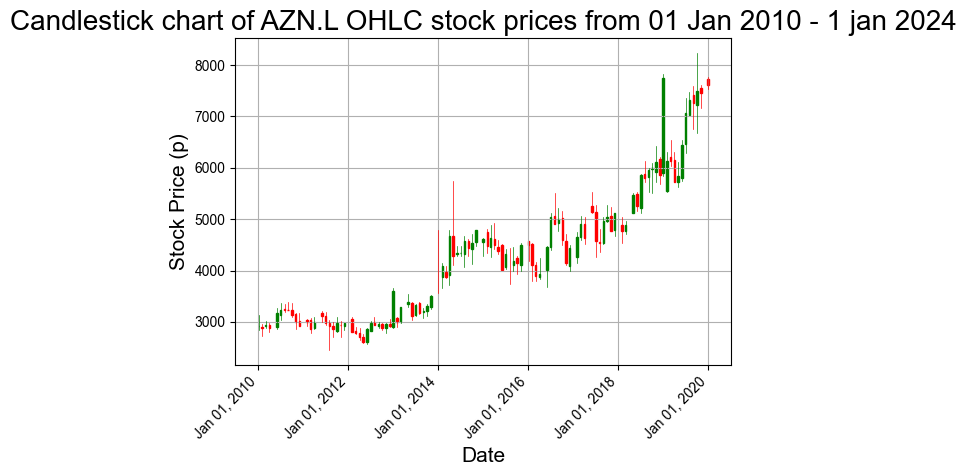

In [8]:
txt = "AZN.L OHLC stock prices from 01 Jan 2010 - 1 jan 2024"

pandas_candlestick_ohlc(azn, stick="month")

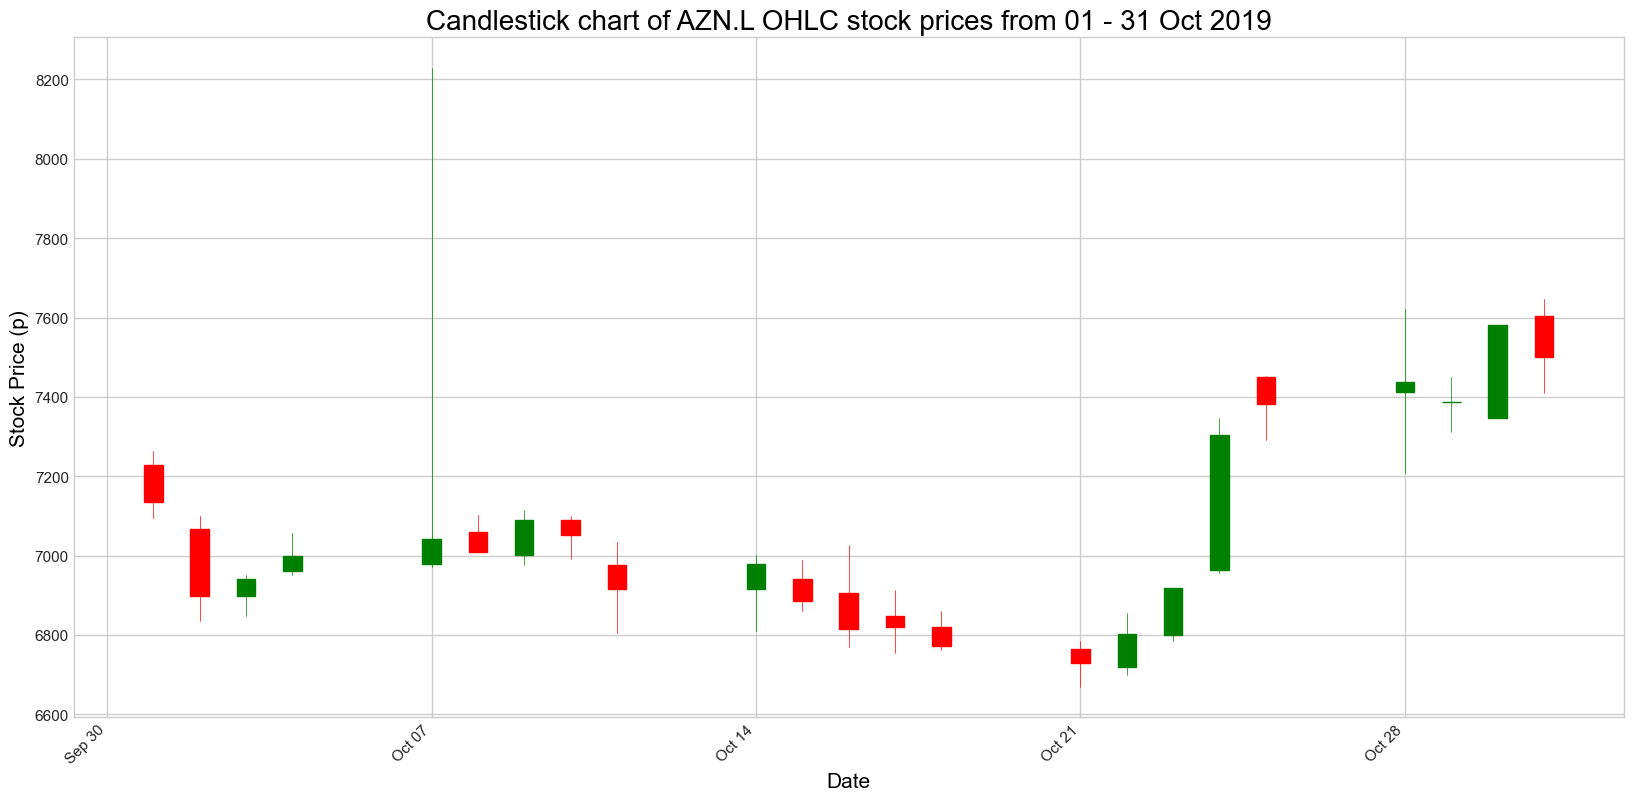

In [9]:
txt = "AZN.L OHLC stock prices from 01 - 31 Oct 2019"

pandas_candlestick_ohlc(azn['2019-10-01':'2019-10-31'], stick="day")

# Technical Indicators

#Moving averages

In [10]:
#  Simple Moving Average (SMA)

# def sma():
#   plt.figure(figsize=(15,9))
#   aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-24'].rolling(window=20).mean().plot(label='20 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-24'].plot(label=f"{label_txt}")
#   plt.title(f"{title_txt}", color = 'black', fontsize = 20)
#   plt.xlabel('Date', color = 'black', fontsize = 15)
#   plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
#   plt.legend()

import matplotlib.pyplot as plt

def sma():
    plt.figure(figsize=(15,9))
    
    # Remove missing values before computing the moving average
    adj_close = aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-24'].dropna()
    
    # Compute the 20-day simple moving average
    moving_avg = adj_close.rolling(window=20).mean()
    
    # Plot the 20-day moving average
    moving_avg.plot(label='20 Day Avg')
    
    # Plot the adjusted close prices after the moving average
    adj_close.plot(label=label_txt)
    
    plt.title(title_txt, color='black', fontsize=20)
    plt.xlabel('Date', color='black', fontsize=15)
    plt.ylabel('Stock Price (p)', color='black', fontsize=15)
    plt.legend()


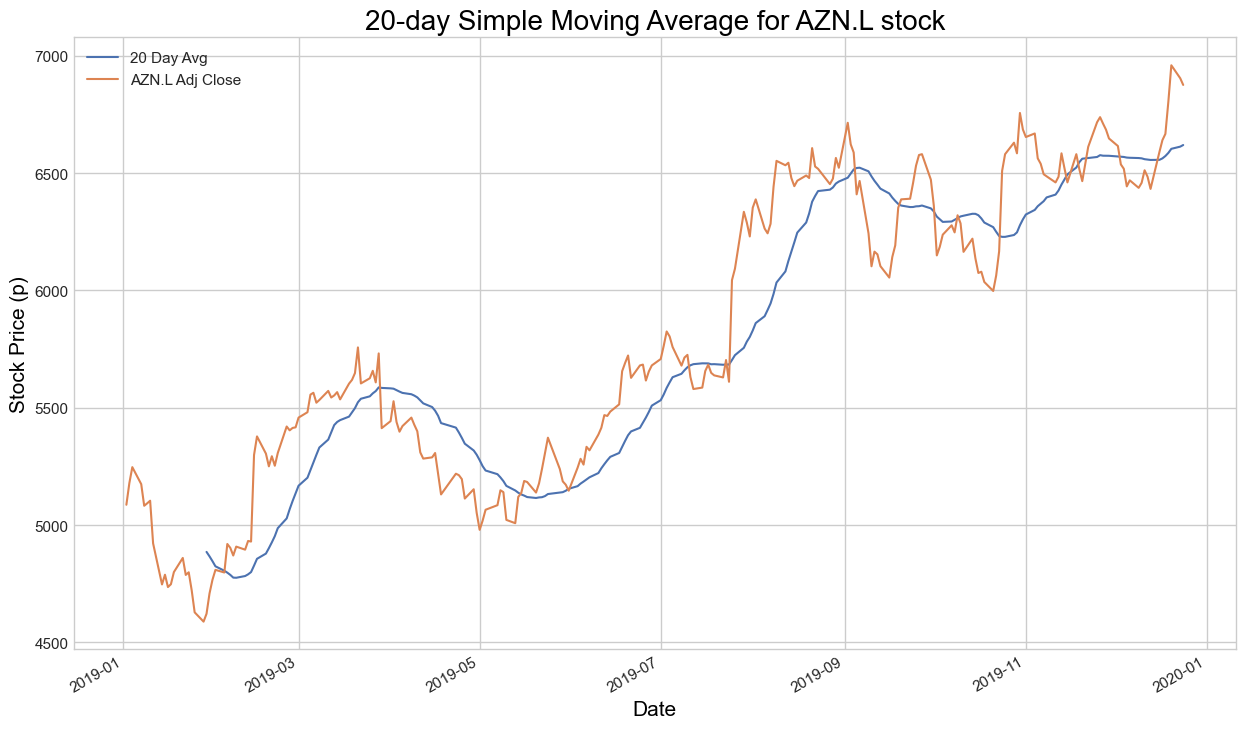

In [11]:
ticker = 'AZN.L'
title_txt = "20-day Simple Moving Average for AZN.L stock"
label_txt = "AZN.L Adj Close"

sma()

In [12]:
#Moving Average Crossover Strategy

# def sma2():
#   plt.figure(figsize=(15,9))
#   aqr_stocks[ticker]['Adj Close'].loc['2010-01-01':'2019-12-24'].rolling(window=20).mean().plot(label='20 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2010-01-01':'2019-12-24'].rolling(window=50).mean().plot(label='50 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2010-01-01':'2019-12-24'].rolling(window=200).mean().plot(label='200 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2010-01-01':'2019-12-24'].plot(label=f"{label_txt}")
#   plt.title(f"{title_txt}", color = 'black', fontsize = 20)
#   plt.xlabel('Date', color = 'black', fontsize = 15)
#   plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
#   plt.legend()

import matplotlib.pyplot as plt

def sma2():
    plt.figure(figsize=(15,9))
    
    # Remove missing values before computing the moving averages
    adj_close = aqr_stocks[ticker]['Adj Close'].loc['2010-01-01':'2019-12-24'].dropna()
    
    # Compute the moving averages
    moving_avg_20d = adj_close.rolling(window=20).mean()
    moving_avg_50d = adj_close.rolling(window=50).mean()
    moving_avg_200d = adj_close.rolling(window=200).mean()
    
    # Plot the moving averages
    moving_avg_20d.plot(label='20 Day Avg')
    moving_avg_50d.plot(label='50 Day Avg')
    moving_avg_200d.plot(label='200 Day Avg')
    
    # Plot the adjusted close prices
    adj_close.plot(label=label_txt)
    
    plt.title(title_txt, color='black', fontsize=20)
    plt.xlabel('Date', color='black', fontsize=15)
    plt.ylabel('Stock Price (p)', color='black', fontsize=15)
    plt.legend()


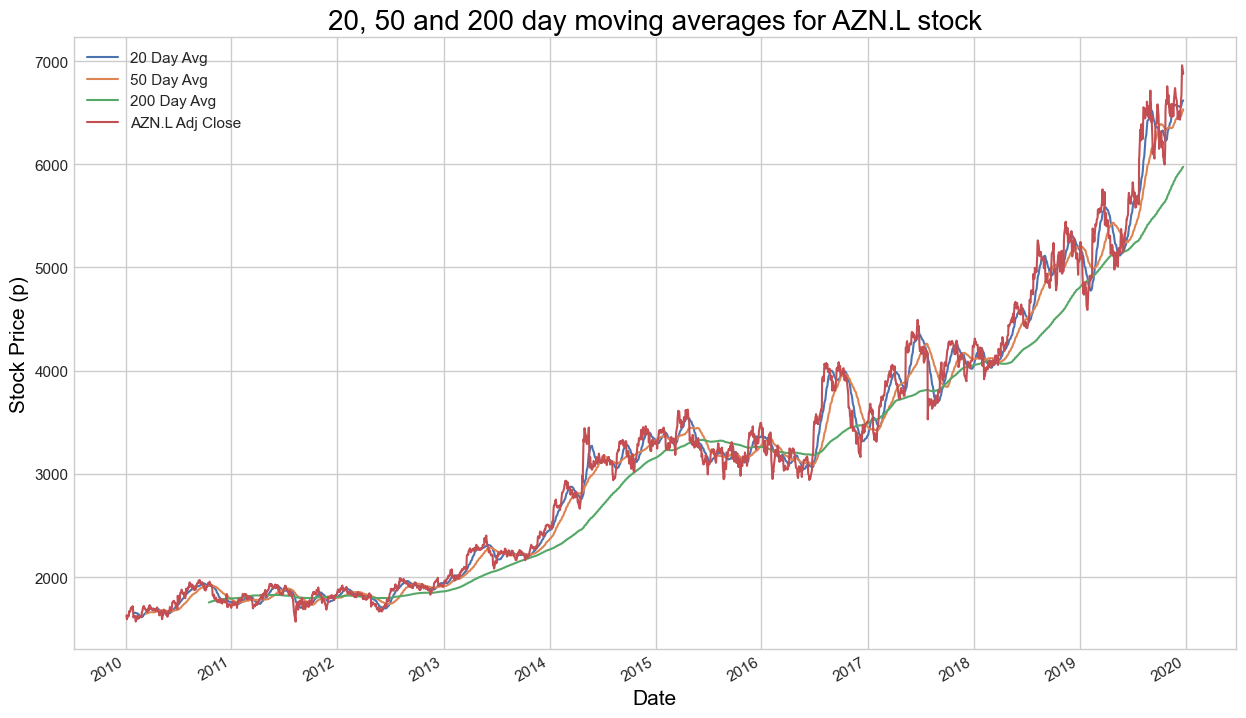

In [13]:
ticker = 'AZN.L'

title_txt = "20, 50 and 200 day moving averages for AZN.L stock"
label_txt = "AZN.L Adj Close"

sma2()
     

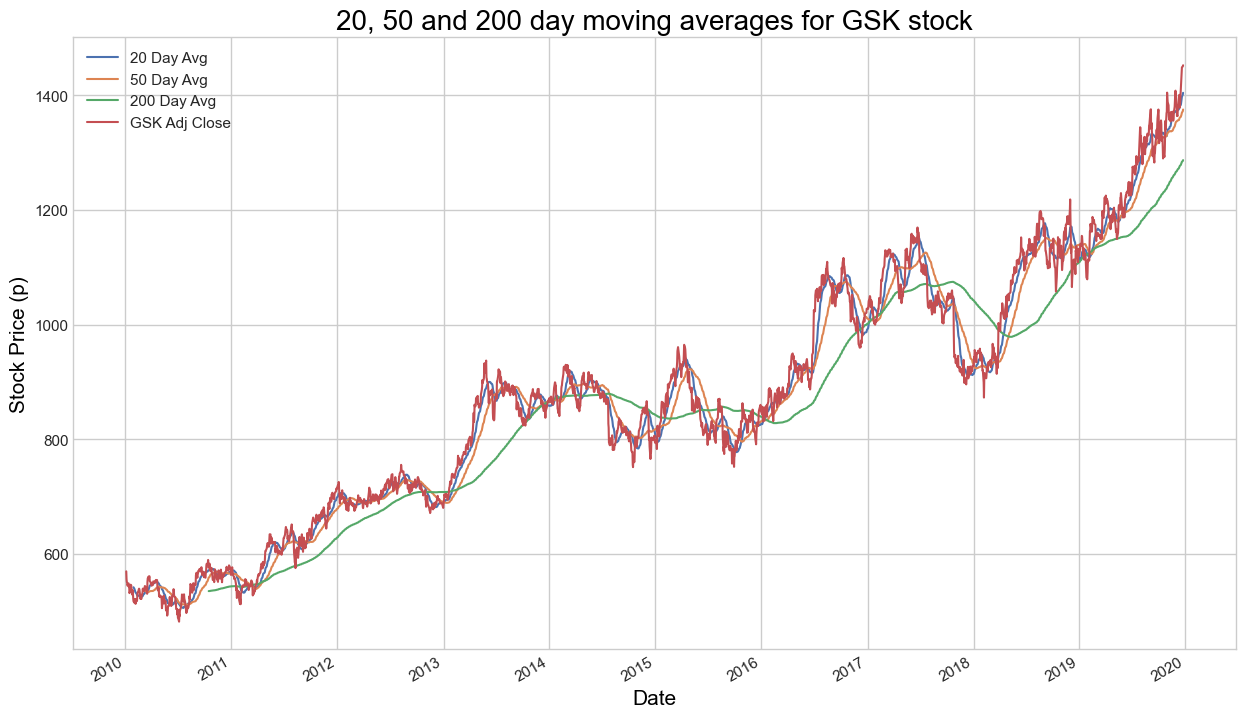

In [14]:
# 20, 50 and 200 day MA repeated for GSK.L Adjusted Close price data for the same time period 

ticker = 'GSK.L'

title_txt = "20, 50 and 200 day moving averages for GSK stock"
label_txt = "GSK Adj Close"

sma2()

In [15]:
#Trading Strategy


azn_sma = azn.copy()
azn_sma.dropna(inplace=True)

In [16]:
azn_sma

Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2912.0,2946.0,2912.000000,2941.0,1627.208374,2091679.0
2010-01-05,2936.0,2949.5,2901.000000,2907.5,1608.673340,2869739.0
2010-01-06,2909.0,2909.0,2850.500000,2875.0,1590.691528,3136541.0
2010-01-07,2879.0,2925.5,2879.000000,2910.5,1610.333252,3748200.0
2010-01-08,2921.0,2927.5,2889.500000,2908.5,1609.226562,2473846.0
...,...,...,...,...,...,...
2019-12-23,7771.0,7824.0,7723.870117,7746.0,6904.253906,2183949.0
2019-12-24,7715.0,7794.0,7631.290039,7714.0,6875.729980,378885.0
2019-12-27,7706.0,7781.0,7641.000000,7745.0,6903.361328,862283.0


In [17]:
# Calculate and add columns for moving averages of Adjusted Close price data

azn_sma["20d"] = np.round(azn_sma["Adj Close"].rolling(window=20, center=False).mean(), 2)
azn_sma["50d"] = np.round(azn_sma["Adj Close"].rolling(window=50, center=False).mean(), 2)
azn_sma["200d"] = np.round(azn_sma["Adj Close"].rolling(window=200, center=False).mean(), 2)


In [18]:
azn_sma.tail()

Price,Open,High,Low,Close,Adj Close,Volume,20d,50d,200d
Date,,,,,,,,,
2019-12-23,7771.0,7824.0,7723.870117,7746.0,6904.253906,2183949.0,6612.83,6518.15,5968.79
2019-12-24,7715.0,7794.0,7631.290039,7714.0,6875.729980,378885.0,6619.70,6532.92,5975.45
2019-12-27,7706.0,7781.0,7641.000000,7745.0,6903.361328,862283.0,6629.32,6549.50,5982.21
2019-12-30,7734.0,7767.0,7654.000000,7654.0,6822.249512,1394124.0,6636.18,6564.35,5988.49
2019-12-31,7603.0,7630.0,7535.000000,7607.0,6780.357910,576956.0,6642.83,6579.24,5994.71


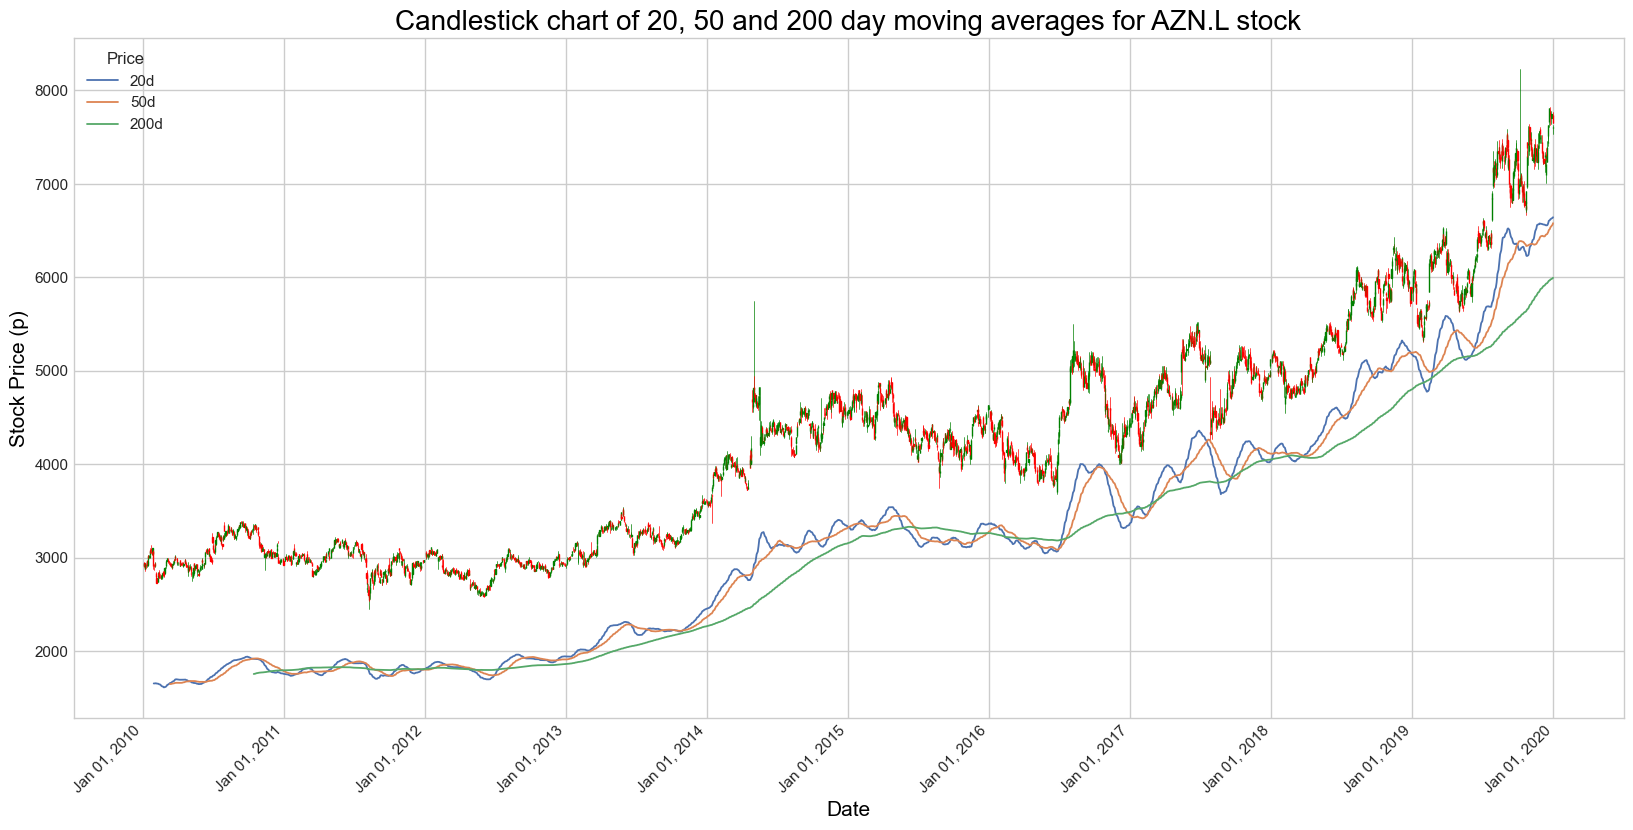

In [19]:
txt = "20, 50 and 200 day moving averages for AZN.L stock"

# Slice rows
pandas_candlestick_ohlc(azn_sma.loc['2010-01-01':'2019-12-31',:], otherseries = ["20d", "50d", "200d"])

In [20]:
#Before using the strategy we will evaluate the quality of it first by backtesting, or looking at how profitable it is on historical data.

In [21]:
azn_sma['20d-200d'] = azn_sma['20d'] - azn_sma['200d']
azn_sma.tail()

Price,Open,High,Low,Close,Adj Close,Volume,20d,50d,200d,20d-200d
Date,,,,,,,,,,
2019-12-23,7771.0,7824.0,7723.870117,7746.0,6904.253906,2183949.0,6612.83,6518.15,5968.79,644.04
2019-12-24,7715.0,7794.0,7631.290039,7714.0,6875.729980,378885.0,6619.70,6532.92,5975.45,644.25
2019-12-27,7706.0,7781.0,7641.000000,7745.0,6903.361328,862283.0,6629.32,6549.50,5982.21,647.11
2019-12-30,7734.0,7767.0,7654.000000,7654.0,6822.249512,1394124.0,6636.18,6564.35,5988.49,647.69
2019-12-31,7603.0,7630.0,7535.000000,7607.0,6780.357910,576956.0,6642.83,6579.24,5994.71,648.12


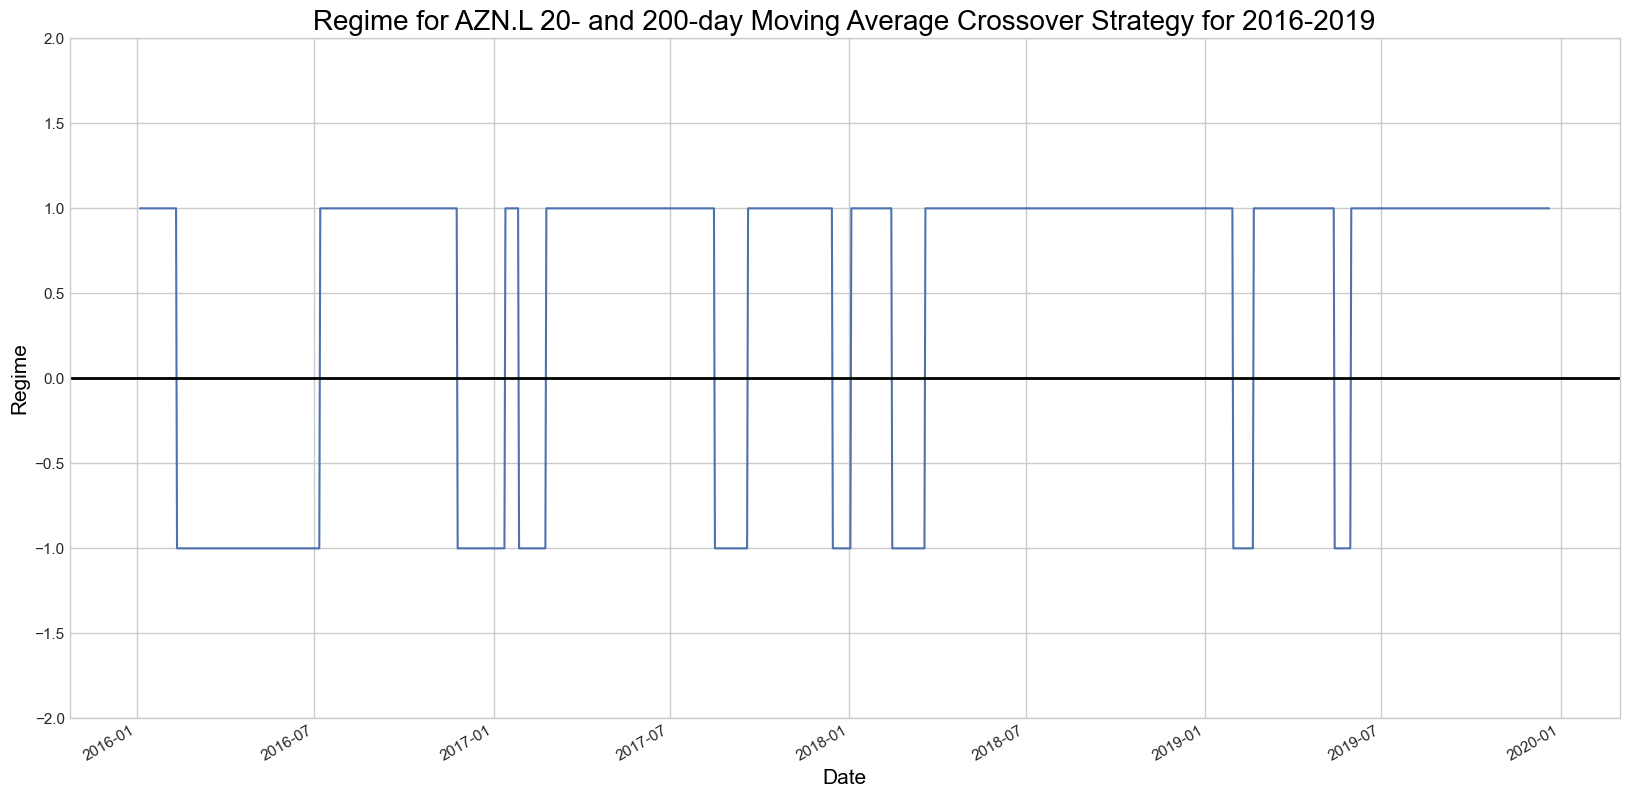

In [22]:
azn_sma["Regime"] = np.where(azn_sma['20d-200d'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Replace bearish regime's values with -1, and to maintain the rest of the vector, the second argument is azn_sma["Regime"]
azn_sma["Regime"] = np.where(azn_sma['20d-200d'] < 0, -1, azn_sma["Regime"])
azn_sma.loc['2016-01-01':'2019-12-22',"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2);
plt.title("Regime for AZN.L 20- and 200-day Moving Average Crossover Strategy for 2016-2019", color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Regime', color = 'black', fontsize = 15);

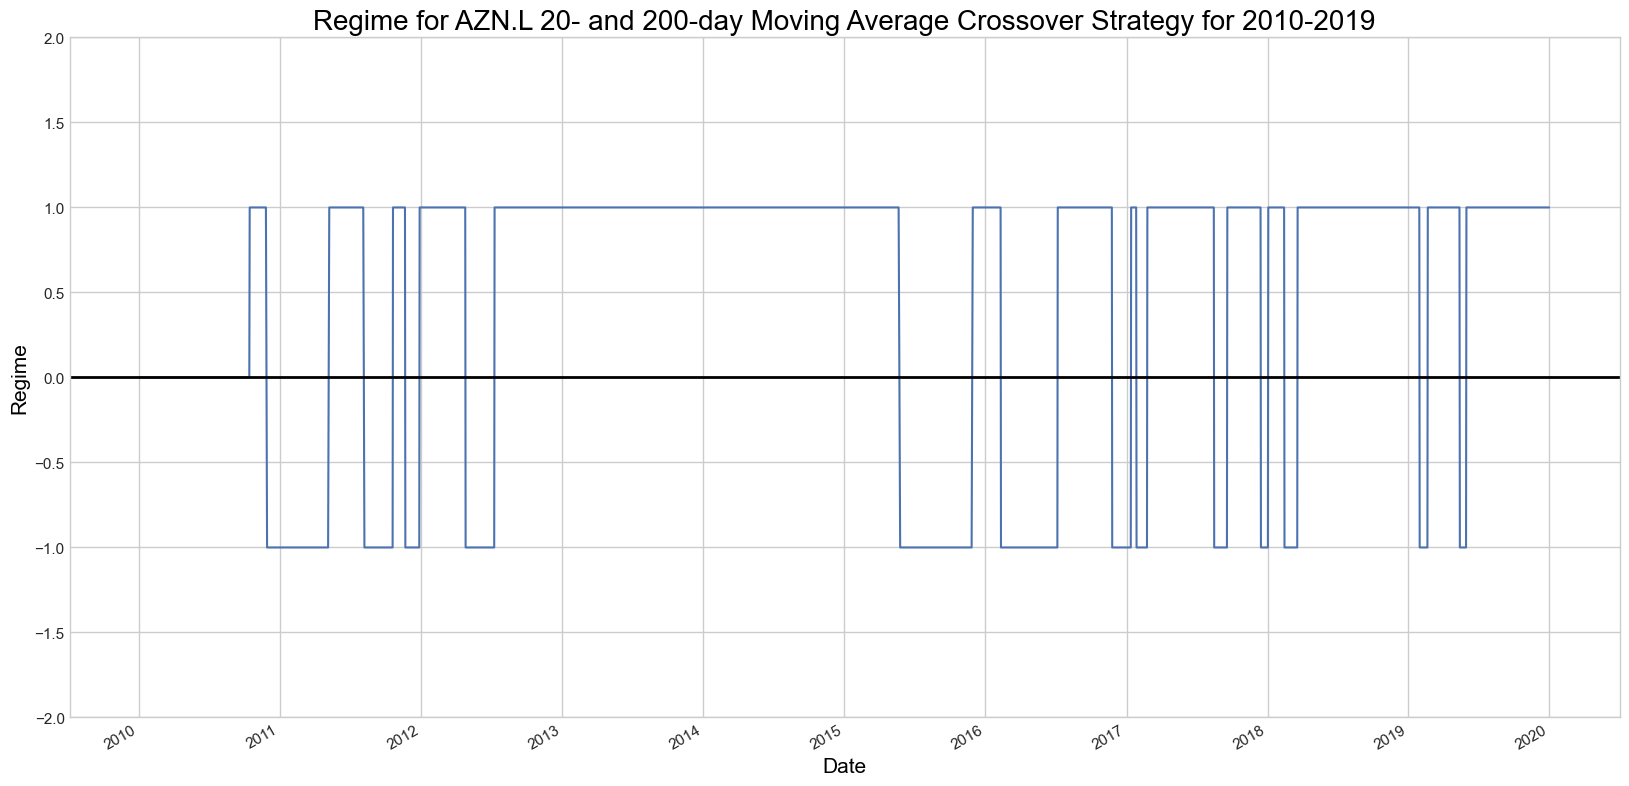

In [23]:
azn_sma["Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2);
plt.title("Regime for AZN.L 20- and 200-day Moving Average Crossover Strategy for 2010-2019", color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Regime', color = 'black', fontsize = 15);

In [24]:
# Number of bullish and bearish days

azn_sma["Regime"].value_counts()

Regime
 1    1721
-1     606
 0     199
Name: count, dtype: int64

In [25]:
azn_sma

Price,Open,High,Low,Close,Adj Close,Volume,20d,50d,200d,20d-200d,Regime
Date,,,,,,,,,,,
2010-01-04,2912.0,2946.0,2912.000000,2941.0,1627.208374,2091679.0,NaN,NaN,NaN,NaN,0
2010-01-05,2936.0,2949.5,2901.000000,2907.5,1608.673340,2869739.0,NaN,NaN,NaN,NaN,0
2010-01-06,2909.0,2909.0,2850.500000,2875.0,1590.691528,3136541.0,NaN,NaN,NaN,NaN,0
2010-01-07,2879.0,2925.5,2879.000000,2910.5,1610.333252,3748200.0,NaN,NaN,NaN,NaN,0
2010-01-08,2921.0,2927.5,2889.500000,2908.5,1609.226562,2473846.0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,7771.0,7824.0,7723.870117,7746.0,6904.253906,2183949.0,6612.83,6518.15,5968.79,644.04,1
2019-12-24,7715.0,7794.0,7631.290039,7714.0,6875.729980,378885.0,6619.70,6532.92,5975.45,644.25,1
2019-12-27,7706.0,7781.0,7641.000000,7745.0,6903.361328,862283.0,6629.32,6549.50,5982.21,647.11,1


In [26]:
regime_orig = azn_sma.iloc[-1, 10]
azn_sma.iloc[-1, 10] = 0
azn_sma["Signal"] = np.sign(azn_sma["Regime"] - azn_sma["Regime"].shift(1))
# Restore original regime data
azn_sma.iloc[-1, 10] = regime_orig
azn_sma.tail()

Price,Open,High,Low,Close,Adj Close,Volume,20d,50d,200d,20d-200d,Regime,Signal
Date,,,,,,,,,,,,
2019-12-23,7771.0,7824.0,7723.870117,7746.0,6904.253906,2183949.0,6612.83,6518.15,5968.79,644.04,1,0.0
2019-12-24,7715.0,7794.0,7631.290039,7714.0,6875.729980,378885.0,6619.70,6532.92,5975.45,644.25,1,0.0
2019-12-27,7706.0,7781.0,7641.000000,7745.0,6903.361328,862283.0,6629.32,6549.50,5982.21,647.11,1,0.0
2019-12-30,7734.0,7767.0,7654.000000,7654.0,6822.249512,1394124.0,6636.18,6564.35,5988.49,647.69,1,0.0
2019-12-31,7603.0,7630.0,7535.000000,7607.0,6780.357910,576956.0,6642.83,6579.24,5994.71,648.12,1,-1.0


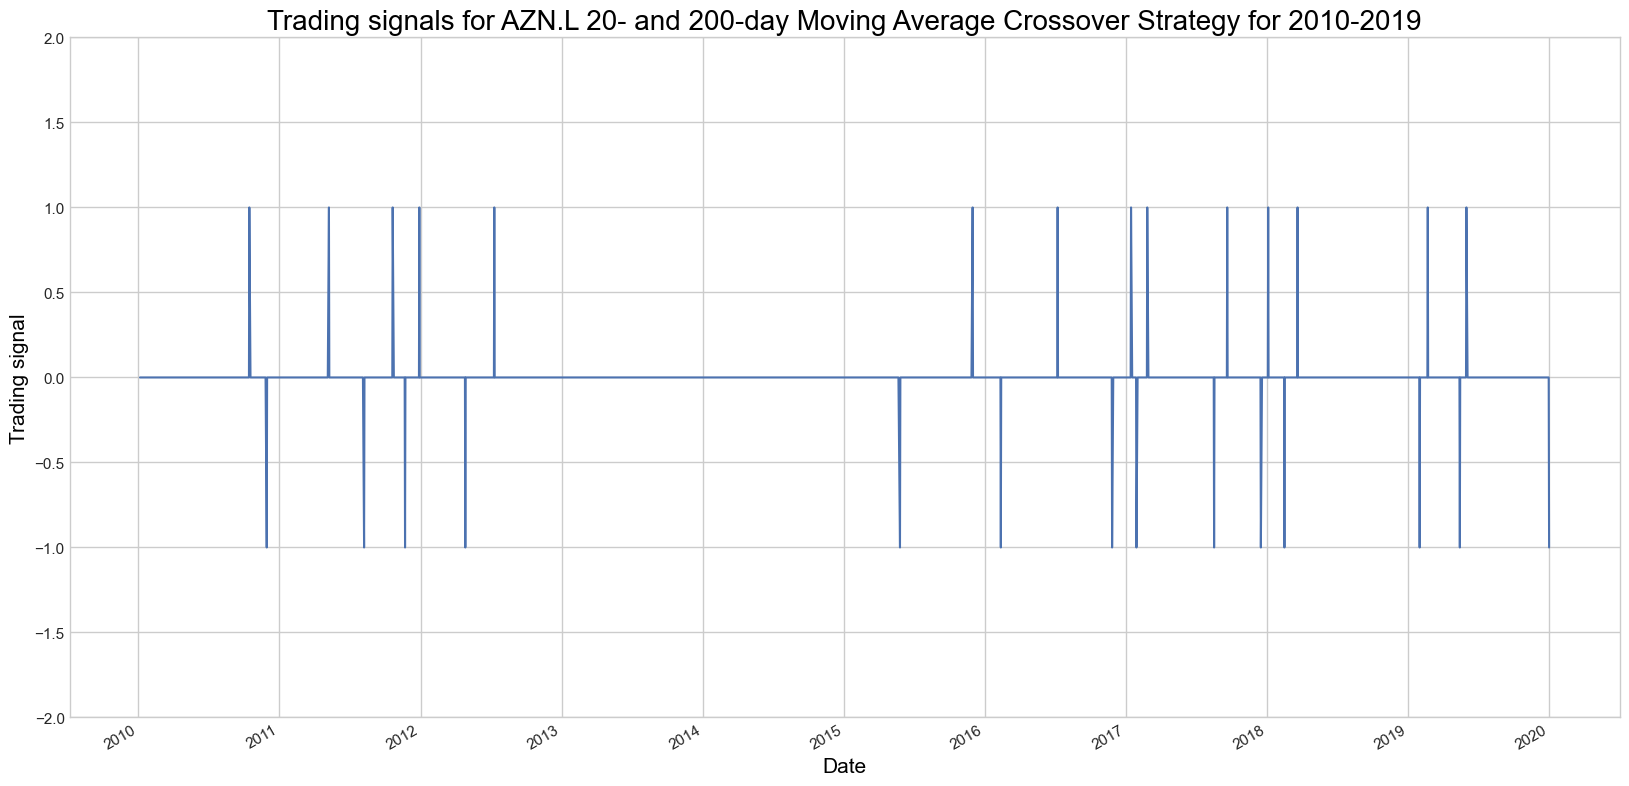

In [27]:
azn_sma["Signal"].plot(ylim = (-2, 2));
plt.title("Trading signals for AZN.L 20- and 200-day Moving Average Crossover Strategy for 2010-2019", color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('Trading signal', color = 'black', fontsize = 15);
     

In [28]:
# Unique counts of trading signals

azn_sma["Signal"].value_counts()

Signal
 0.0    2497
 1.0      14
-1.0      14
Name: count, dtype: int64

In [29]:
# Identify what the price of the stock is at every buy.

azn_sma.loc[azn_sma["Signal"] == 1, "Close"]

Date
2010-10-15    3322.5
2011-05-09    3100.5
2011-10-21    3040.5
2011-12-29    2970.0
2012-07-10    2915.0
2015-11-30    4502.5
2016-07-07    4593.5
2017-01-13    4609.0
2017-02-24    4609.0
2017-09-19    4774.0
2018-01-03    5166.0
2018-03-20    4868.0
2019-02-20    6143.0
2019-05-31    5833.0
Name: Close, dtype: float64

In [30]:
# Identify what the price of the stock is at every sell.

azn_sma.loc[azn_sma["Signal"] == -1, "Close"]

Date
2010-11-29    3023.0
2011-08-08    2595.0
2011-11-22    2783.0
2012-04-26    2666.5
2015-05-26    4373.5
2016-02-11    3991.0
2016-11-25    4301.5
2017-01-27    4239.0
2017-08-16    4467.5
2017-12-15    4881.0
2018-02-14    4830.0
2019-01-30    5464.0
2019-05-14    5803.0
2019-12-31    7607.0
Name: Close, dtype: float64

In [31]:
# Identify what the price of the stock is at every sell.

azn_sma.loc[azn_sma["Signal"] == -1, "Close"]

Date
2010-11-29    3023.0
2011-08-08    2595.0
2011-11-22    2783.0
2012-04-26    2666.5
2015-05-26    4373.5
2016-02-11    3991.0
2016-11-25    4301.5
2017-01-27    4239.0
2017-08-16    4467.5
2017-12-15    4881.0
2018-02-14    4830.0
2019-01-30    5464.0
2019-05-14    5803.0
2019-12-31    7607.0
Name: Close, dtype: float64

In [32]:
# Create a dataframe with trades, including the price at the trade and the regime under which the trade is made.

azn_signals = pd.concat([
        pd.DataFrame({"Price": azn_sma.loc[azn_sma["Signal"] == 1, "Adj Close"],
                     "Regime": azn_sma.loc[azn_sma["Signal"] == 1, "Regime"],
                     "Signal": "Buy"}),
        pd.DataFrame({"Price": azn_sma.loc[azn_sma["Signal"] == -1, "Adj Close"],
                     "Regime": azn_sma.loc[azn_sma["Signal"] == -1, "Regime"],
                     "Signal": "Sell"}),
    ])
azn_signals.sort_index(inplace = True)
azn_signals
     

,Price,Regime,Signal
Date,,,
2010-10-15,1933.306641,1,Buy
2010-11-29,1759.032593,-1,Sell
2011-05-09,1876.360840,1,Buy
2011-08-08,1599.094727,-1,Sell
2011-10-21,1873.621094,1,Buy
2011-11-22,1714.944214,-1,Sell
2011-12-29,1830.177979,1,Buy
2012-04-26,1713.334351,-1,Sell
2012-07-10,1873.006226,1,Buy


In [33]:
# the profitability of long trades

azn_long_profits = pd.DataFrame({
        "Price": azn_signals.loc[(azn_signals["Signal"] == "Buy") &
                                  azn_signals["Regime"] == 1, "Price"],
        "Profit": pd.Series(azn_signals["Price"] - azn_signals["Price"].shift(1)).loc[
            azn_signals.loc[(azn_signals["Signal"].shift(1) == "Buy") & (azn_signals["Regime"].shift(1) == 1)].index
        ].tolist(),
        "End Date": azn_signals["Price"].loc[
            azn_signals.loc[(azn_signals["Signal"].shift(1) == "Buy") & (azn_signals["Regime"].shift(1) == 1)].index
        ].index
    })
azn_long_profits

,Price,Profit,End Date
Date,,,
2010-10-15,1933.306641,-174.274048,2010-11-29
2011-05-09,1876.360840,-277.266113,2011-08-08
2011-10-21,1873.621094,-158.676880,2011-11-22
2011-12-29,1830.177979,-116.843628,2012-04-26
2012-07-10,1873.006226,1385.297241,2015-05-26
2015-11-30,3399.996826,-386.251221,2016-02-11
2016-07-07,3578.248047,-182.247314,2016-11-25
2017-01-13,3638.769531,-292.112061,2017-01-27
2017-02-24,3759.317383,-58.830322,2017-08-16


### Exponential Moving Average

In [34]:
# 20-day EMA for Adjusted Close price for 2019

# def ewma():
#   plt.figure(figsize=(15,9))
#   aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-31'].ewm(20).mean().plot(label='20 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-31'].plot(label=f"{label_txt}")
#   plt.title(f"{title_txt}", color = 'black', fontsize = 20)
#   plt.xlabel('Date', color = 'black', fontsize = 15)
#   plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
#   plt.legend()
import matplotlib.pyplot as plt

def ewma():
    plt.figure(figsize=(15,9))
    
    # Remove missing values from adjusted close prices
    adj_close = aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-31'].dropna()
    
    # Compute the EWMA for 20-day average
    ewma_20d = adj_close.ewm(span=20).mean()
    
    # Plot the 20-day EWMA
    ewma_20d.plot(label='20 Day Avg')
    
    # Plot the adjusted close prices
    adj_close.plot(label=label_txt)
    
    plt.title(title_txt, color='black', fontsize=20)
    plt.xlabel('Date', color='black', fontsize=15)
    plt.ylabel('Stock Price (p)', color='black', fontsize=15)
    plt.legend()



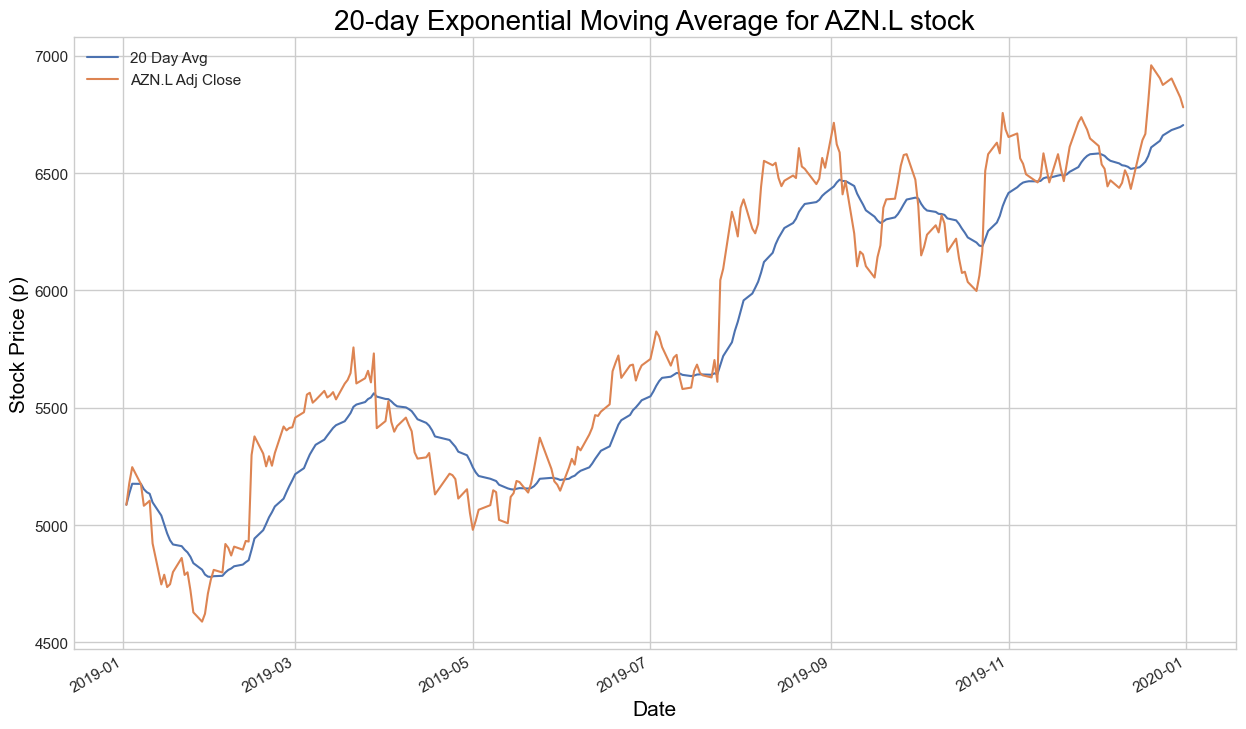

In [35]:
ticker = 'AZN.L'
title_txt = "20-day Exponential Moving Average for AZN.L stock"
label_txt = "AZN.L Adj Close"

ewma()
     

In [36]:
# 20-, 50- and 200-day EMA for Adjusted Close price for 2016-2019

# def ewma2():
#   plt.figure(figsize=(15,9))
#   aqr_stocks[ticker]['Adj Close'].loc['2016-01-01':'2019-12-31'].ewm(20).mean().plot(label='20 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2016-01-01':'2019-12-31'].ewm(50).mean().plot(label='50 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2016-01-01':'2019-12-31'].ewm(200).mean().plot(label='200 Day Avg')
#   aqr_stocks[ticker]['Adj Close'].loc['2016-01-01':'2019-12-31'].plot(label=f"{label_txt}")
#   plt.title(f"{title_txt}", color = 'black', fontsize = 20)
#   plt.xlabel('Date', color = 'black', fontsize = 15)
#   plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
#   plt.legend()

import matplotlib.pyplot as plt

def ewma2():
    plt.figure(figsize=(15,9))
    
    # Remove missing values from adjusted close prices
    adj_close = aqr_stocks[ticker]['Adj Close'].loc['2016-01-01':'2019-12-31'].dropna()
    
    # Compute the EMAs for 20-day, 50-day, and 200-day averages
    ewma_20d = adj_close.ewm(span=20).mean()
    ewma_50d = adj_close.ewm(span=50).mean()
    ewma_200d = adj_close.ewm(span=200).mean()
    
    # Plot the EMAs for 20-day, 50-day, and 200-day averages
    ewma_20d.plot(label='20 Day Avg')
    ewma_50d.plot(label='50 Day Avg')
    ewma_200d.plot(label='200 Day Avg')
    
    # Plot the adjusted close prices
    adj_close.plot(label=label_txt)
    
    plt.title(title_txt, color='black', fontsize=20)
    plt.xlabel('Date', color='black', fontsize=15)
    plt.ylabel('Stock Price (p)', color='black', fontsize=15)
    plt.legend()


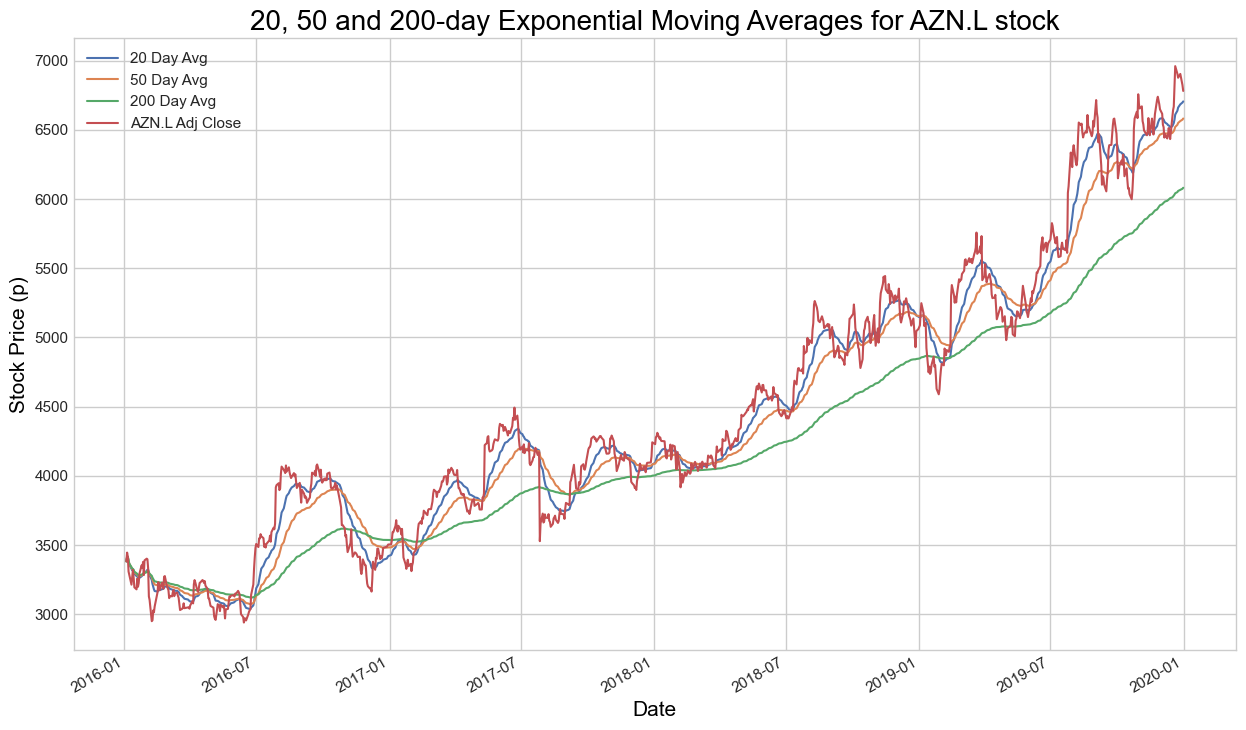

In [37]:
ticker = 'AZN.L'
title_txt = "20, 50 and 200-day Exponential Moving Averages for AZN.L stock"
label_txt = "AZN.L Adj Close"

ewma2()

## Triple Moving Average Crossover Strategy

In [38]:

 azn.dropna(inplace=True)
azn[['Adj Close']]['2019-05-01':'2019-10-31']

Price,Adj Close
Date,
2019-05-01,4979.887695
2019-05-02,5018.710449
2019-05-03,5065.473145
2019-05-07,5084.885254
2019-05-08,5148.412598
...,...
2019-10-25,6580.700195
2019-10-28,6629.723145
2019-10-29,6584.264648


In [39]:
def adj_6mo():
  sns.set(rc={'figure.figsize':(15, 9)})
  aqr_stocks[ticker]['Adj Close'].loc['2019-05-01':'2019-10-31'].dropna().plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

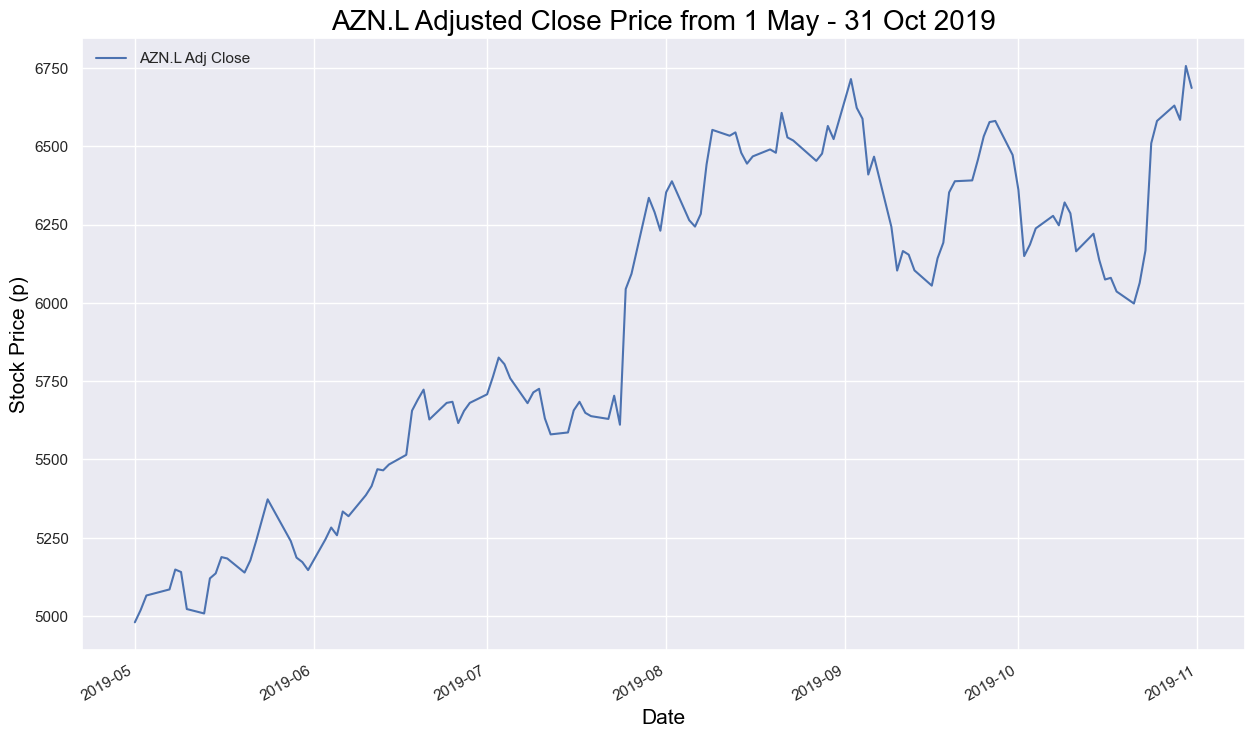

In [40]:
ticker = 'AZN.L'
title_txt = "AZN.L Adjusted Close Price from 1 May - 31 Oct 2019"
label_txt = "AZN.L Adj Close "

adj_6mo()

In [41]:
azn_adj_6mo = azn[['Adj Close']]['2019-05-01':'2019-10-31']

In [42]:
ShortEMA = azn_adj_6mo['Adj Close'].ewm(span=5, adjust=False).mean()
MiddleEMA = azn_adj_6mo['Adj Close'].ewm(span=21, adjust=False).mean()
LongEMA = azn_adj_6mo['Adj Close'].ewm(span=63, adjust=False).mean()

In [43]:
def ewma3():
  sns.set(rc={'figure.figsize':(15, 9)})
  plt.plot(aqr_stocks[ticker]['Adj Close'].loc['2019-05-01':'2019-10-31'].dropna(), label=f"{label_txt}", color = 'blue')
  plt.plot(ShortEMA, label = 'Short/Fast EMA', color = 'red')
  plt.plot(MiddleEMA, label = 'Middle/Medium EMA', color = 'orange')
  plt.plot(LongEMA, label = 'Long/Slow EMA', color = 'green')
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()
     

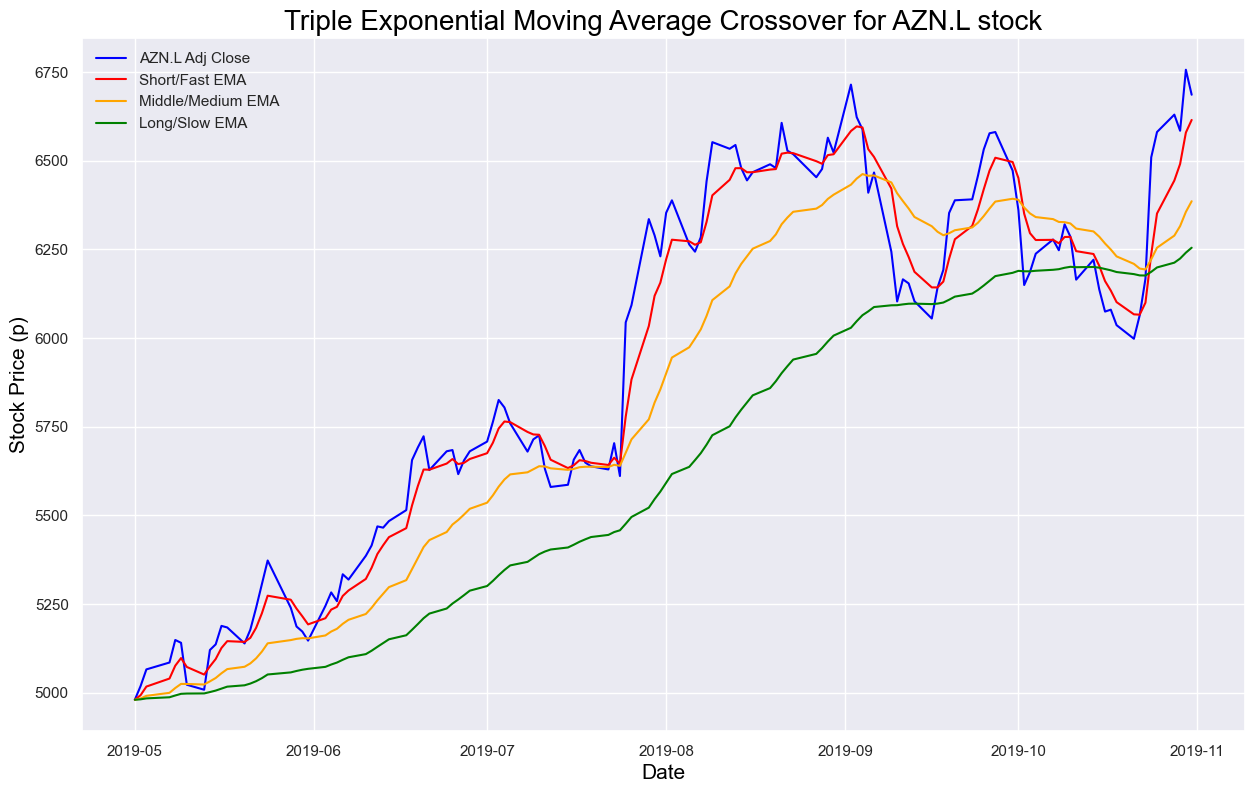

In [44]:
ticker = 'AZN.L'
title_txt = "Triple Exponential Moving Average Crossover for AZN.L stock"
label_txt = "AZN.L Adj Close"

ewma3()

In [45]:
azn_adj_6mo['Short'] = ShortEMA
azn_adj_6mo['Middle'] = MiddleEMA
azn_adj_6mo['Long'] = LongEMA
     

In [46]:
azn_adj_6mo

Price,Adj Close,Short,Middle,Long
Date,,,,
2019-05-01,4979.887695,4979.887695,4979.887695,4979.887695
2019-05-02,5018.710449,4992.828613,4983.417037,4981.100906
2019-05-03,5065.473145,5017.043457,4990.876683,4983.737539
2019-05-07,5084.885254,5039.657389,4999.422916,4986.898405
2019-05-08,5148.412598,5075.909125,5012.967433,4991.945723
...,...,...,...,...
2019-10-25,6580.700195,6350.980285,6254.486030,6198.847910
2019-10-28,6629.723145,6443.894572,6288.598495,6212.312761
2019-10-29,6584.264648,6490.684597,6315.477236,6223.936258


In [47]:
def buy_sell_ewma3(data):
  
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Adj Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Adj Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
      buy_list.append(data['Adj Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Adj Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)
  
  return (buy_list, sell_list)
    
     

In [48]:
azn_adj_6mo['Buy'] = buy_sell_ewma3(azn_adj_6mo)[0]
azn_adj_6mo['Sell'] = buy_sell_ewma3(azn_adj_6mo)[1]


In [49]:
def buy_sell_ewma3_plot():
  sns.set(rc={'figure.figsize':(18, 10)})
  plt.plot(aqr_stocks[ticker]['Adj Close'].loc['2019-05-01':'2019-10-31'].dropna(), label=f"{label_txt}", color = 'blue', alpha = 0.35)
  plt.plot(ShortEMA, label = 'Short/Fast EMA', color = 'red', alpha = 0.35)
  plt.plot(MiddleEMA, label = 'Middle/Medium EMA', color = 'orange', alpha = 0.35)
  plt.plot(LongEMA, label = 'Long/Slow EMA', color = 'green', alpha = 0.35)
  plt.scatter(azn_adj_6mo.index, azn_adj_6mo['Buy'], color = 'green', label = 'Buy Signal', marker = '^', alpha = 1)
  plt.scatter(azn_adj_6mo.index, azn_adj_6mo['Sell'], color = 'red', label = 'Buy Signal', marker='v', alpha = 1)
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()
     

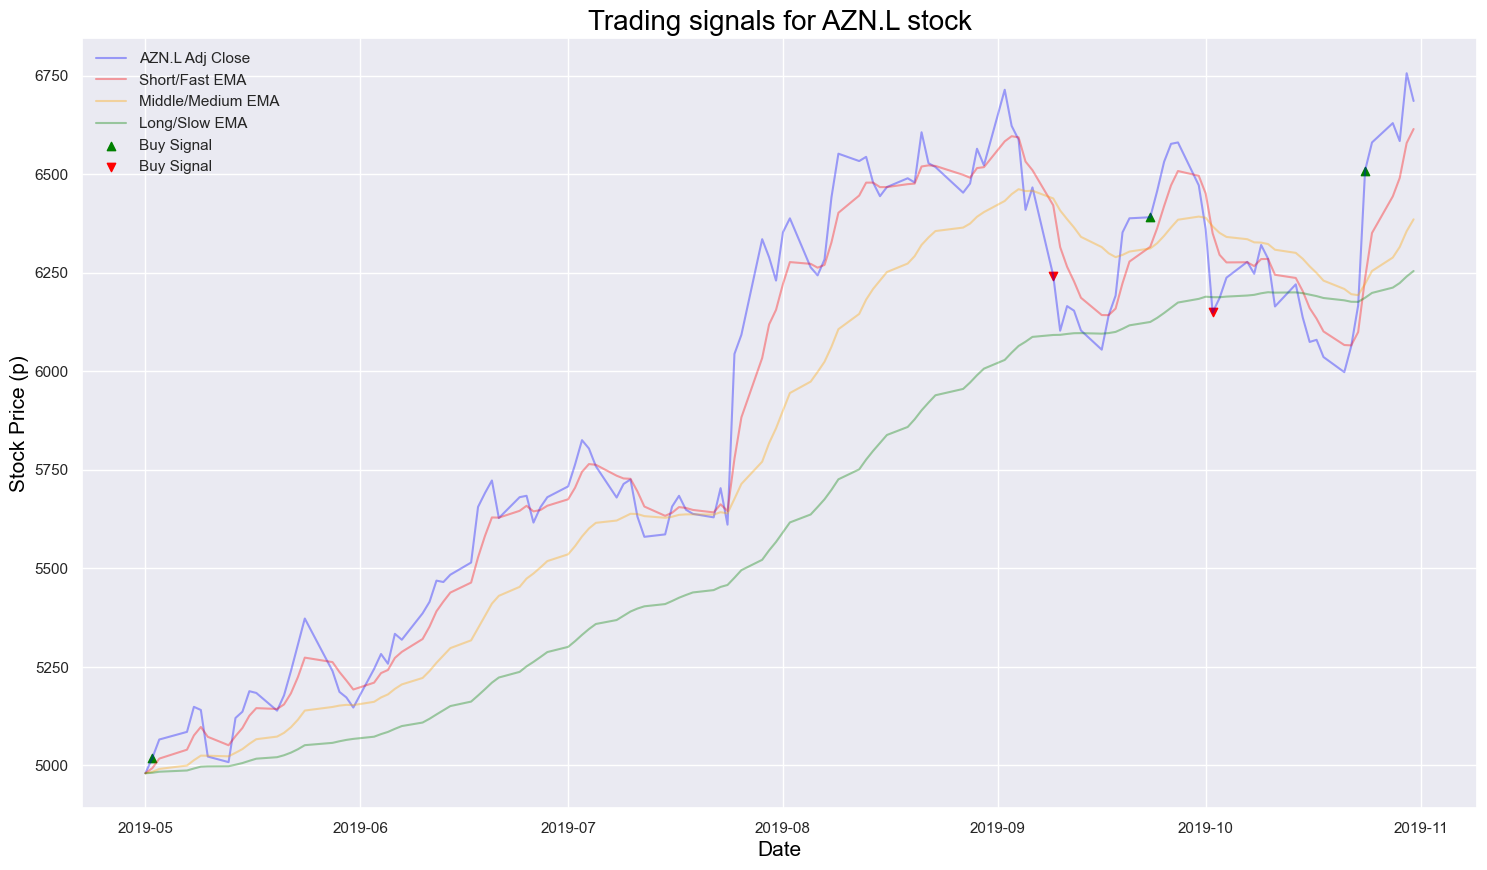

In [50]:
ticker = 'AZN.L'
title_txt = "Trading signals for AZN.L stock"
label_txt = "AZN.L Adj Close"

buy_sell_ewma3_plot()

#Exponential Smoothing

need to do

### Moving average convergence divergence (MACD)

In [51]:
def adj_3mo():
  sns.set(rc={'figure.figsize':(15, 9)})
  aqr_stocks[ticker]['Adj Close'].loc['2019-08-01':'2019-10-31'].dropna().plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

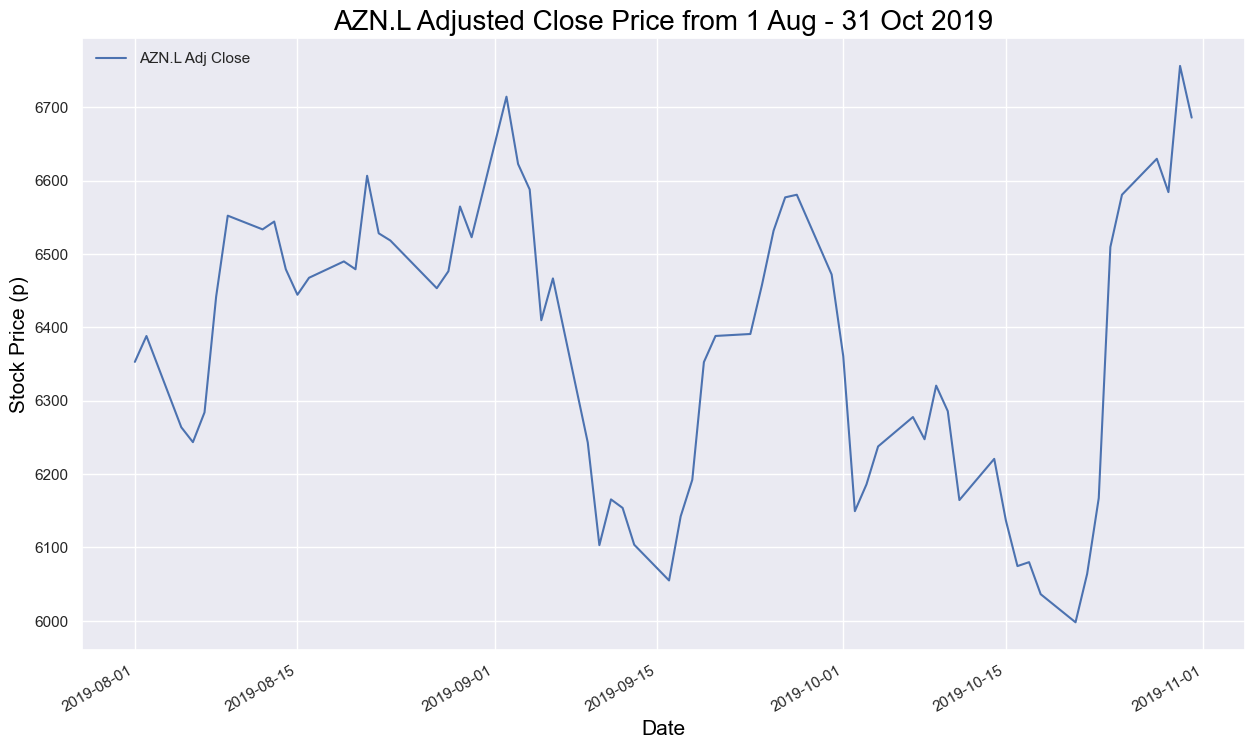

In [52]:
ticker = 'AZN.L'
title_txt = "AZN.L Adjusted Close Price from 1 Aug - 31 Oct 2019"
label_txt = "AZN.L Adj Close "

adj_3mo()

In [53]:
azn_adj_3mo = azn[['Adj Close']]['2019-08-01':'2019-10-31']

In [54]:
ShortEMA = azn_adj_3mo['Adj Close'].ewm(span=12, adjust=False).mean()
LongEMA = azn_adj_3mo['Adj Close'].ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()
     

In [55]:
def macd():
  plt.figure(figsize=(15, 9))
  plt.plot(azn_adj_3mo.index, MACD, label = f"{macd_label_txt}", color= 'red')
  plt.plot(azn_adj_3mo.index, signal, label = f"{sig_label_txt}", color= 'blue')
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xticks (rotation = 45)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.legend(loc='upper left')
  plt.show()
     

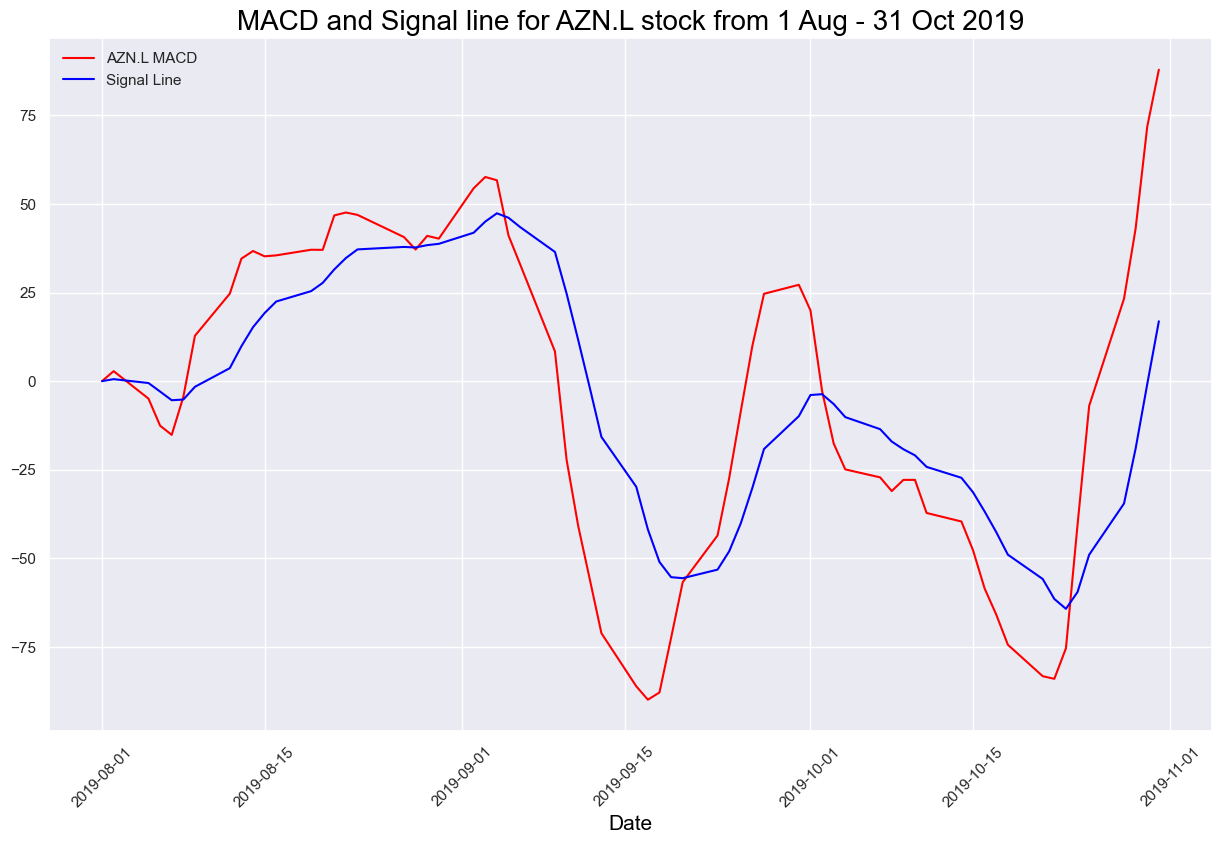

In [56]:
ticker = 'AZN.L'
title_txt = 'MACD and Signal line for AZN.L stock from 1 Aug - 31 Oct 2019'
macd_label_txt ="AZN.L MACD"
sig_label_txt = "Signal Line"

macd()

In [57]:
# Create new columns for the MACD and Signal Line data

azn_adj_3mo['MACD'] = MACD
azn_adj_3mo['Signal Line'] = signal
azn_adj_3mo

Price,Adj Close,MACD,Signal Line
Date,,,
2019-08-01,6352.796875,0.000000,0.000000
2019-08-02,6388.090332,2.815432,0.563086
2019-08-05,6263.681641,-4.935169,-0.536565
2019-08-06,6243.388184,-12.570188,-2.943289
2019-08-07,6283.974609,-15.171126,-5.388857
...,...,...,...
2019-10-25,6580.700195,-6.973999,-49.004183
2019-10-28,6629.723145,23.269879,-34.549371
2019-10-29,6584.264648,43.073723,-19.024752


In [58]:
# Function to signal when to buy and sell

def buy_sell_macd(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Adj Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Adj Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)

In [59]:
# Create buy and sell columns

a = buy_sell_macd(azn_adj_3mo)
azn_adj_3mo['Buy_Signal_Price'] = a[0]
azn_adj_3mo['Sell_Signal_Price'] = a[1]
     

azn_adj_3mo

Price,Adj Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2019-08-01,6352.796875,0.000000,0.000000,NaN,NaN
2019-08-02,6388.090332,2.815432,0.563086,6388.090332,NaN
2019-08-05,6263.681641,-4.935169,-0.536565,NaN,6263.681641
2019-08-06,6243.388184,-12.570188,-2.943289,NaN,NaN
2019-08-07,6283.974609,-15.171126,-5.388857,NaN,NaN
...,...,...,...,...,...
2019-10-25,6580.700195,-6.973999,-49.004183,NaN,NaN
2019-10-28,6629.723145,23.269879,-34.549371,NaN,NaN
2019-10-29,6584.264648,43.073723,-19.024752,NaN,NaN


In [60]:
# Plot buy and sell signals

def buy_sell_macd_plot():
  plt.figure(figsize=(20, 10))
  plt.scatter(azn_adj_3mo.index, azn_adj_3mo['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
  plt.scatter(azn_adj_3mo.index, azn_adj_3mo['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
  plt.plot(azn_adj_3mo['Adj Close'], label='Adj Close Price', alpha = 0.35)
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Adj Close Price')
  plt.legend(loc = 'upper left')
  plt.show()

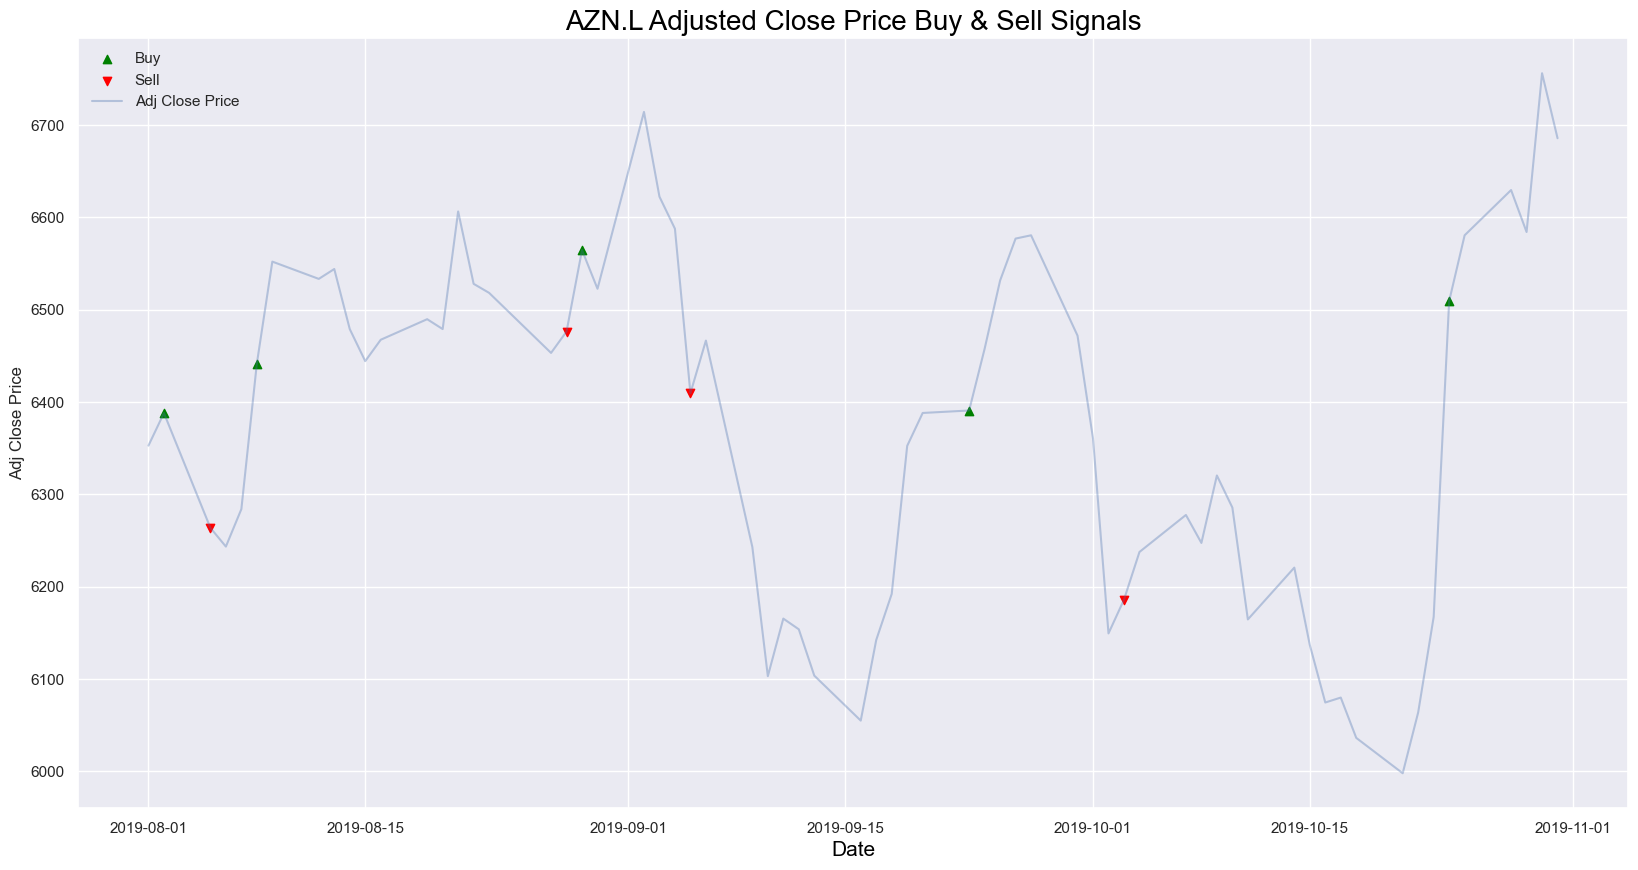

In [61]:
ticker = 'AZN.L'
title_txt = 'AZN.L Adjusted Close Price Buy & Sell Signals'

buy_sell_macd_plot()

## 5.2 Momentum Strategies

In [62]:
def adj_12mo():
  sns.set(rc={'figure.figsize':(15, 9)})
  aqr_stocks[ticker]['Adj Close'].loc['2019-01-01':'2019-12-31'].dropna().plot(label=f"{label_txt}")
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Stock Price (p)', color = 'black', fontsize = 15);
  plt.legend()

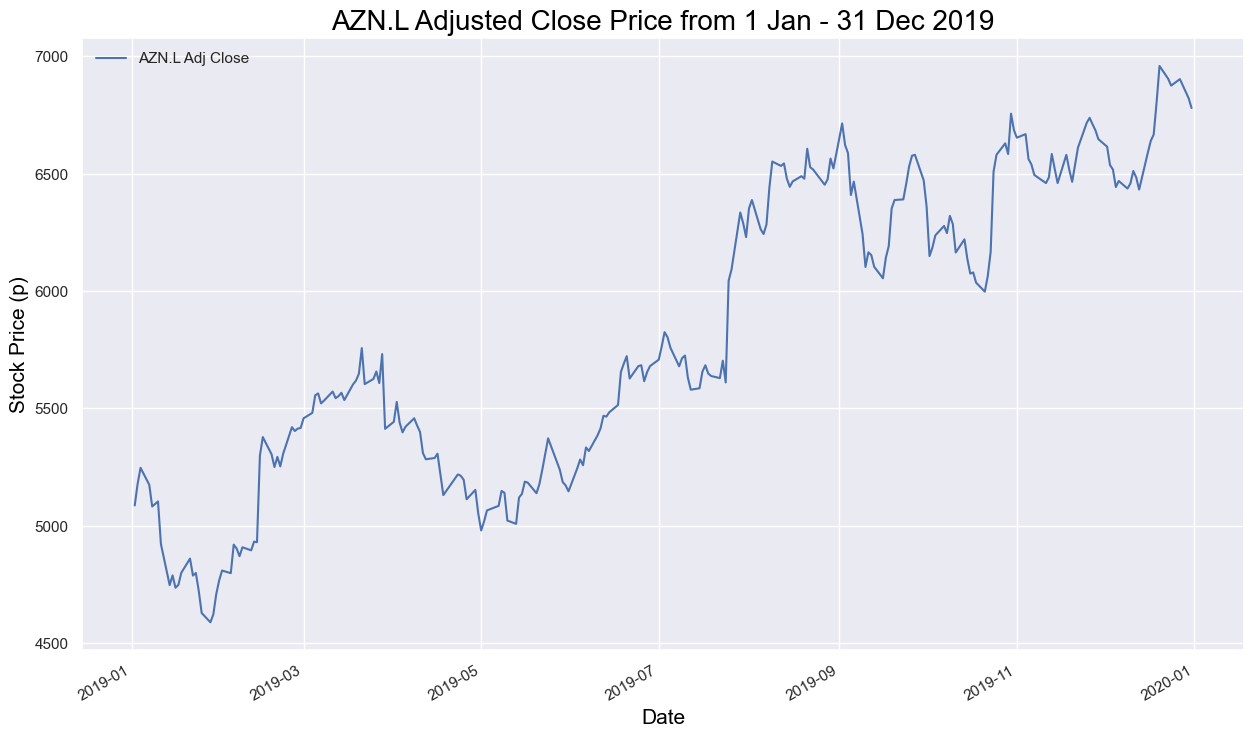

In [63]:
ticker = 'AZN.L'
title_txt = "AZN.L Adjusted Close Price from 1 Jan - 31 Dec 2019"
label_txt = "AZN.L Adj Close "

adj_12mo()

In [64]:
azn_adj_12mo = azn[['Adj Close']]['2019-01-01':'2019-12-31']

In [65]:

# Prepare the data to calculate the RSI
delta = azn_adj_12mo['Adj Close'].diff(1)
delta
     

Date
2019-01-02          NaN
2019-01-03    92.204590
2019-01-04    68.076172
2019-01-07   -72.385742
2019-01-08   -92.203613
                ...    
2019-12-23   -55.261719
2019-12-24   -28.523926
2019-12-27    27.631348
2019-12-30   -81.111816
2019-12-31   -41.891602
Name: Adj Close, Length: 253, dtype: float64

In [66]:
delta = delta.dropna()
delta

Date
2019-01-03    92.204590
2019-01-04    68.076172
2019-01-07   -72.385742
2019-01-08   -92.203613
2019-01-09    10.341797
                ...    
2019-12-23   -55.261719
2019-12-24   -28.523926
2019-12-27    27.631348
2019-12-30   -81.111816
2019-12-31   -41.891602
Name: Adj Close, Length: 252, dtype: float64

In [67]:
# Get positive gains (up) and negative gains (down)
up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0


# Get time period

period = 14

In [68]:
# Calculate average gain and average loss
AVG_Gain = up.rolling(window=period).mean()
#AVG_Loss = abs(down.rolling(window=period).mean())
AVG_Loss = down.abs().rolling(window=period).mean()

In [69]:
# Calculate RSI based on SMA

# Calculate Relative Strength (RS)
RS = AVG_Gain / AVG_Loss
# Calculate RSI
RSI = 100.0 - (100.0 / (1.0 + RS))

In [70]:
def rsi():
  sns.set(rc={'figure.figsize':(20, 10)})
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('RSI', color = 'black', fontsize = 15);
  RSI.plot()

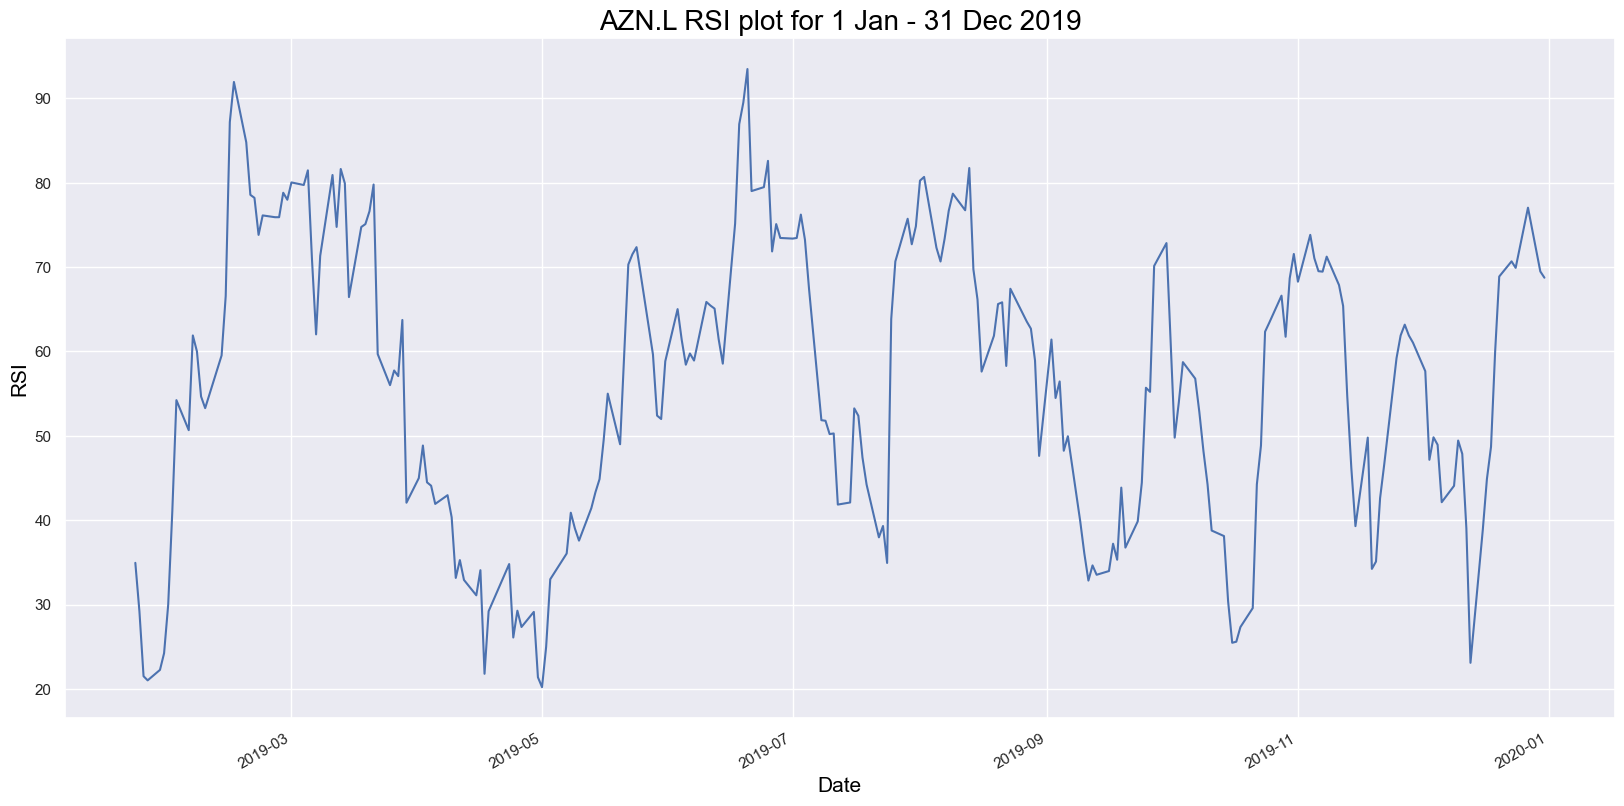

In [71]:
ticker = 'AZN.L'
title_txt = "AZN.L RSI plot for 1 Jan - 31 Dec 2019"
label_txt = "AZN.L RSI level"

rsi()

In [72]:
new_df = pd.DataFrame()
new_df['Adj Close'] = azn_adj_12mo['Adj Close']
new_df['RSI'] = RSI
new_df
     

,Adj Close,RSI
Date,,
2019-01-02,5086.717773,NaN
2019-01-03,5178.922363,NaN
2019-01-04,5246.998535,NaN
2019-01-07,5174.612793,NaN
2019-01-08,5082.409180,NaN
...,...,...
2019-12-23,6904.253906,70.682841
2019-12-24,6875.729980,69.910653
2019-12-27,6903.361328,77.044089


In [73]:
# Plot corresponding RSI values and the significant levels

def rsi_sma():
  plt.figure(figsize=(20, 10))
  plt.title(f"{title_txt}", color = 'black', fontsize = 20)
  plt.plot(new_df.index, new_df['RSI'])
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.axhline(0, linestyle='--', alpha = 0.5, color='gray')
  plt.axhline(10, linestyle='--', alpha = 0.5, color='orange')
  plt.axhline(20, linestyle='--', alpha = 0.5, color='green')
  plt.axhline(30, linestyle='--', alpha = 0.5, color='red')
  plt.axhline(70, linestyle='--', alpha = 0.5, color='red')
  plt.axhline(80, linestyle='--', alpha = 0.5, color='green')
  plt.axhline(90, linestyle='--', alpha = 0.5, color='orange')
  plt.axhline(100, linestyle='--', alpha = 0.5, color='gray')
  plt.show()

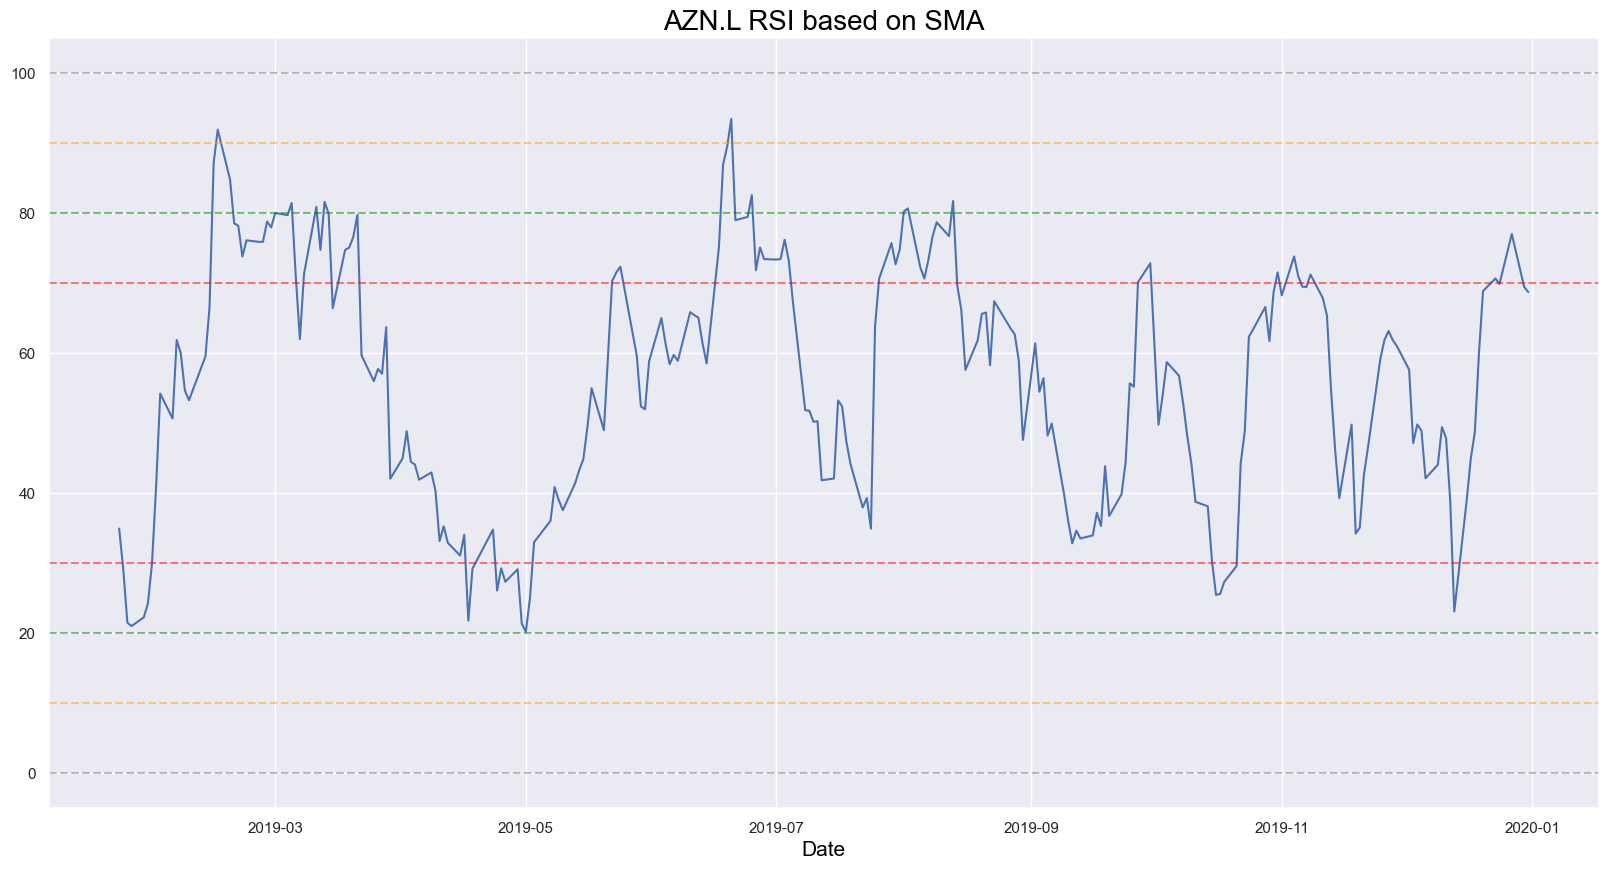

In [74]:
title_txt = 'AZN.L RSI based on SMA'

rsi_sma()


# Rate of Change (ROC)

In [75]:
azn_roc = azn.copy()
azn_roc

Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2912.0,2946.0,2912.000000,2941.0,1627.208374,2091679.0
2010-01-05,2936.0,2949.5,2901.000000,2907.5,1608.673340,2869739.0
2010-01-06,2909.0,2909.0,2850.500000,2875.0,1590.691528,3136541.0
2010-01-07,2879.0,2925.5,2879.000000,2910.5,1610.333252,3748200.0
2010-01-08,2921.0,2927.5,2889.500000,2908.5,1609.226562,2473846.0
...,...,...,...,...,...,...
2019-12-23,7771.0,7824.0,7723.870117,7746.0,6904.253906,2183949.0
2019-12-24,7715.0,7794.0,7631.290039,7714.0,6875.729980,378885.0
2019-12-27,7706.0,7781.0,7641.000000,7745.0,6903.361328,862283.0


In [76]:
azn_roc_12mo = azn_roc['2019-01-01':'2019-12-31']
azn_roc_12mo 

Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,5857.0,5925.0,5743.000000,5903.0,5086.717773,1853042.0
2019-01-03,5877.0,6069.0,5841.000000,6010.0,5178.922363,2483351.0
2019-01-04,6037.0,6089.0,5944.000000,6089.0,5246.998535,2495405.0
2019-01-07,6082.0,6082.0,5982.000000,6005.0,5174.612793,2582745.0
2019-01-08,5953.0,6002.0,5898.000000,5898.0,5082.409180,2517905.0
...,...,...,...,...,...,...
2019-12-23,7771.0,7824.0,7723.870117,7746.0,6904.253906,2183949.0
2019-12-24,7715.0,7794.0,7631.290039,7714.0,6875.729980,378885.0
2019-12-27,7706.0,7781.0,7641.000000,7745.0,6903.361328,862283.0


In [77]:
azn_roc_12mo['ROC'] = ( azn_roc_12mo['Adj Close'] / azn_roc_12mo['Adj Close'].shift(9) -1 ) * 100
azn_roc_12mo[['Adj Close', 'ROC']]

Price,Adj Close,ROC
Date,,
2019-01-02,5086.717773,NaN
2019-01-03,5178.922363,NaN
2019-01-04,5246.998535,NaN
2019-01-07,5174.612793,NaN
2019-01-08,5082.409180,NaN
...,...,...
2019-12-23,6904.253906,6.900363
2019-12-24,6875.729980,5.584449
2019-12-27,6903.361328,6.460490


In [78]:
# selection of data - last 100 days

azn_roc_100d = azn_roc_12mo[-100:]
dates = azn_roc_100d.index
price = azn_roc_100d['Adj Close']
roc = azn_roc_100d['ROC']

In [79]:
# Plot AZN.L Adj Close Price and 9-day ROC for last 100 days of 2019

fig = plt.figure(figsize=(16,10))
fig.subplots_adjust(hspace=0)

plt.rcParams.update({'font.size': 14})

<Figure size 1600x1000 with 0 Axes>

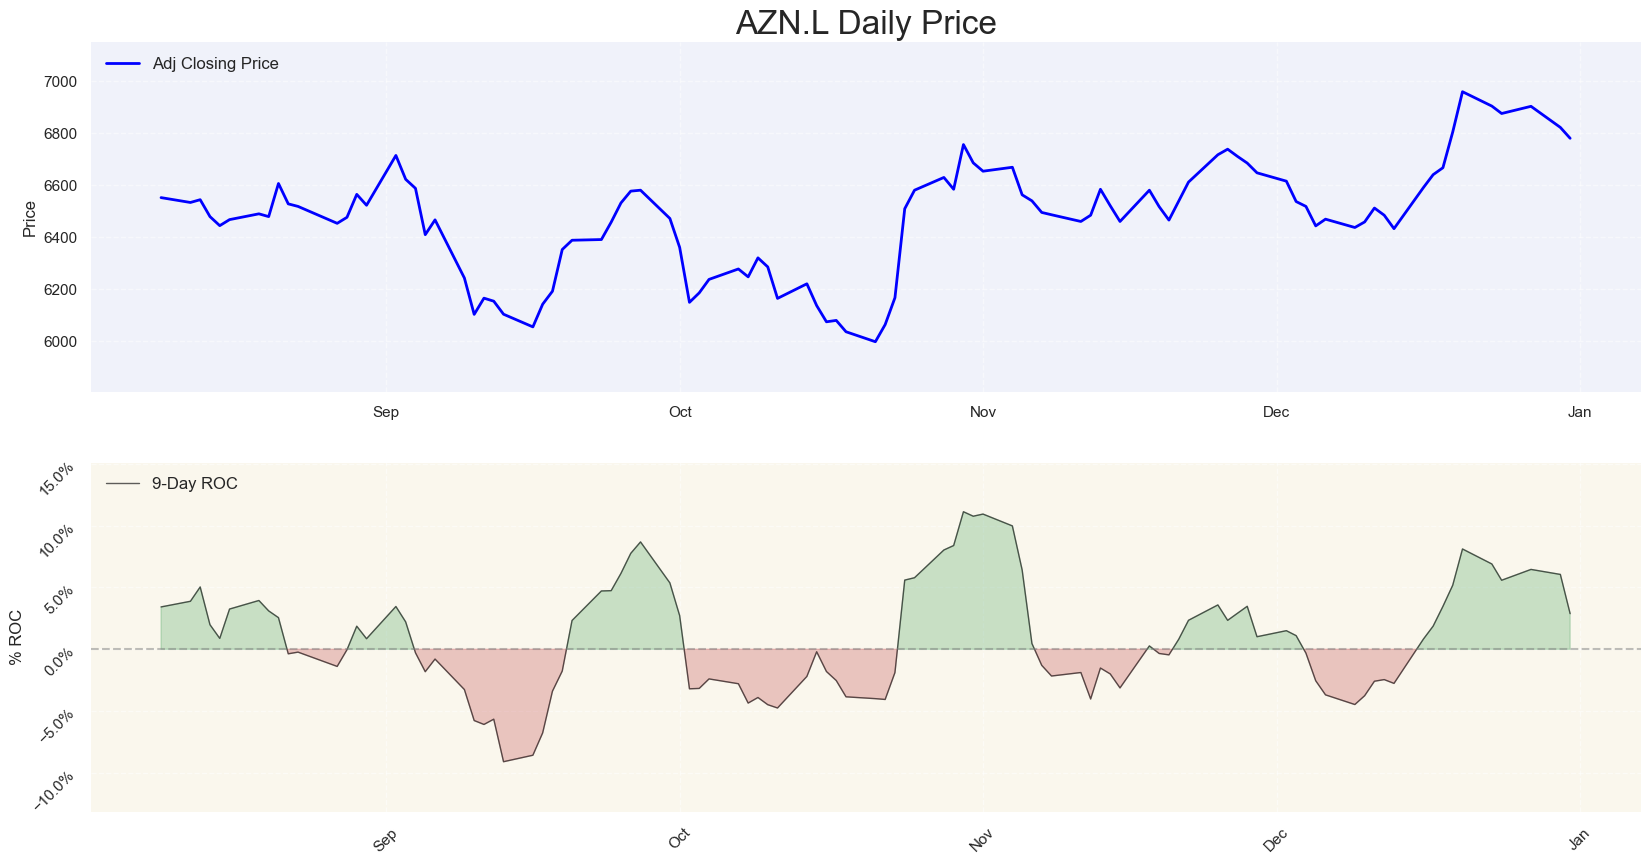

In [80]:
# Price subplot
price_ax = plt.subplot(2, 1, 1)
price_ax.plot(dates, price, color='blue', linewidth=2, label="Adj Closing Price")
price_ax.legend(loc="upper left", fontsize=12)
price_ax.set_ylabel("Price")
price_ax.set_title("AZN.L Daily Price", fontsize=24)

# ROC subplot
roc_ax = plt.subplot(2, 1, 2, sharex = price_ax)
roc_ax.plot(roc, color='k', linewidth = 1, alpha=0.7, label="9-Day ROC")
roc_ax.legend(loc="upper left", fontsize=12)
roc_ax.set_ylabel("% ROC")

# Adding a horizontal line at the zero level in the ROC subplot:
roc_ax.axhline(0, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)

# Filling the areas between the indicator and the level 0 line:
roc_ax.fill_between(dates, 0, roc, where = (roc >= 0), color='g', alpha=0.3, interpolate=True)
roc_ax.fill_between(dates, 0, roc, where = (roc  < 0), color='r', alpha=0.3, interpolate=True)

# Formatting the date labels
roc_ax.xaxis.set_major_formatter(DateFormatter('%b'))

# Formatting the labels on the y axis for ROC:
roc_ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter())

# Adding a grid to both subplots:
price_ax.grid(b=True, linestyle='--', alpha=0.5)
roc_ax.grid(b=True, linestyle='--', alpha=0.5)

# Setting a background color for the both subplots:
price_ax.set_facecolor((.94,.95,.98))
roc_ax.set_facecolor((.98,.97,.93))

# Adding margins around the plots:
price_ax.margins(0.05, 0.2)
roc_ax.margins(0.05, 0.2)

# Hiding the tick marks from the horizontal and vertical axis:
price_ax.tick_params(left=False, bottom=False)
roc_ax.tick_params(left=False, bottom=False, labelrotation=45)

# Hiding all the spines for the price subplot:
for s in price_ax.spines.values():
    s.set_visible(False)
# Hiding all the spines for the ROC subplot:
for s in roc_ax.spines.values():
    s.set_visible(False)

# To better separate the two subplots, we reinstate a spine in between them
roc_ax.spines['top'].set_visible(True)
roc_ax.spines['top'].set_linewidth(1.5)

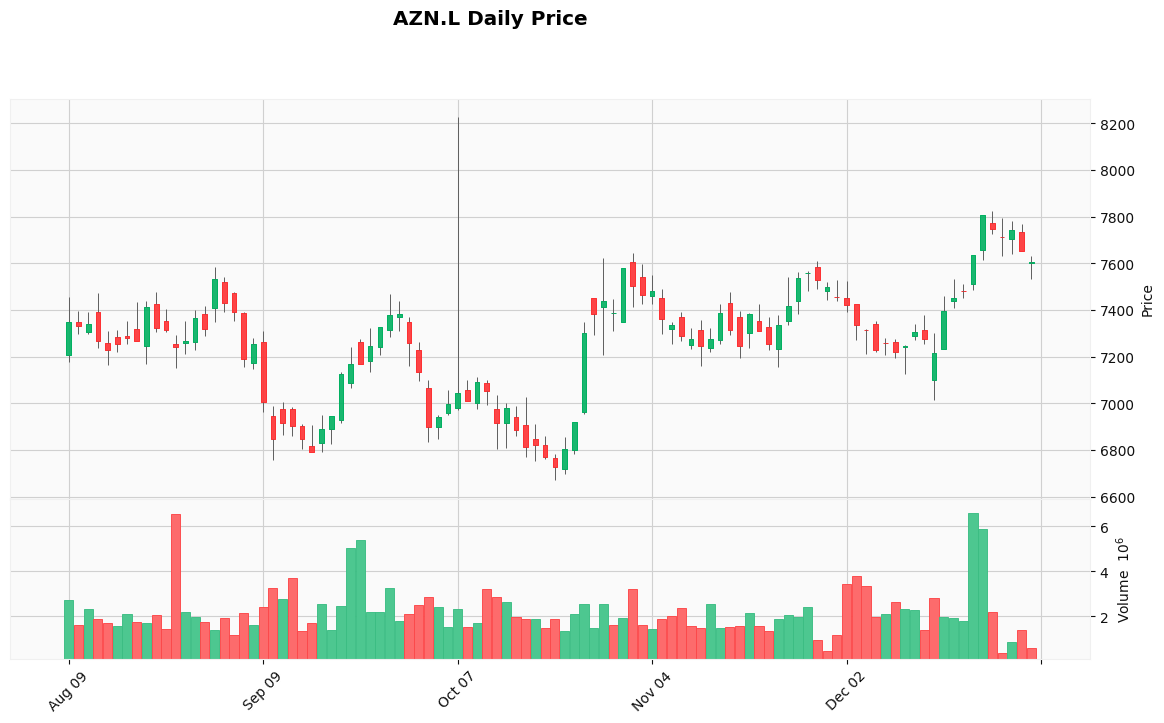

In [81]:
# Candlestick and volume plot for same time frame

mpf.plot(azn_roc_100d, type='candle',  style='yahoo', figsize=(15,8),  title="AZN.L Daily Price", volume=True)


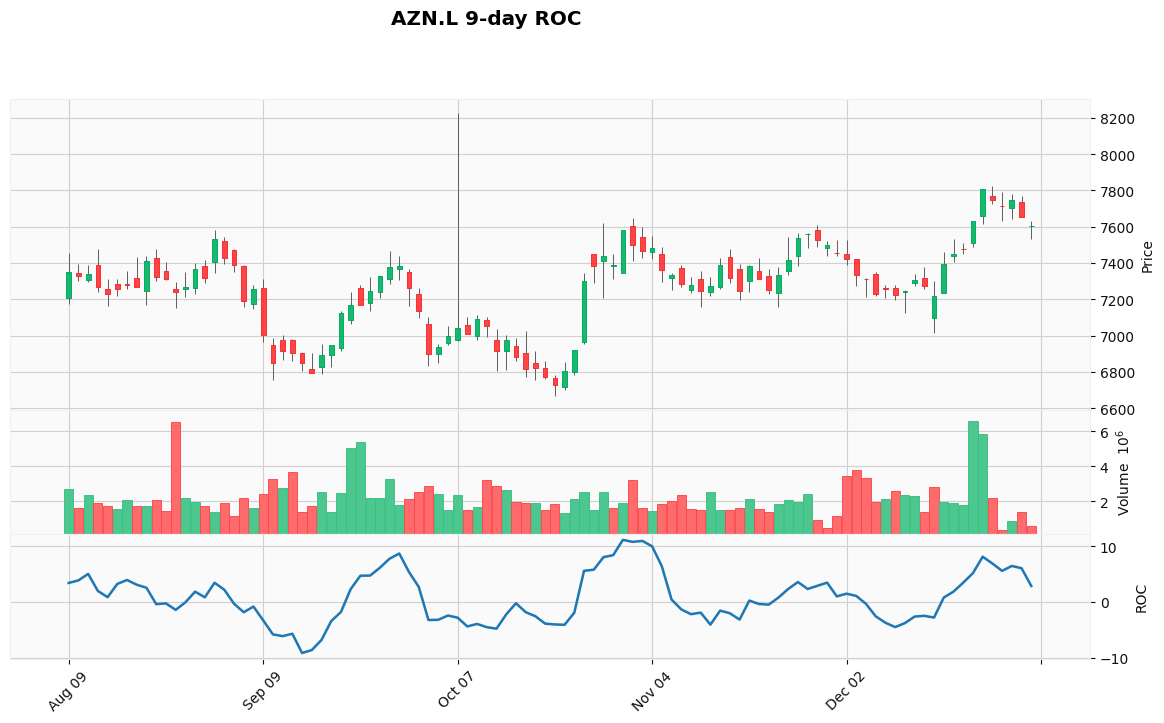

In [82]:
# Combined Candlestick, ROC and Volume plot

# We create an additional plot planing it on the third panel
roc_plot = mpf.make_addplot(roc, panel=2, ylabel='ROC')

#We pass the additional plot using the addplot parameter
mpf.plot(azn_roc_100d, type='candle',  style='yahoo', figsize=(15,8), addplot=roc_plot, title="AZN.L 9-day ROC ", volume=True)
     

 # Volume Trading Strategies

In [83]:
# Create copy of dataframe for AZN.L stock

azn_obv = azn.copy()
azn_obv

Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2912.0,2946.0,2912.000000,2941.0,1627.208374,2091679.0
2010-01-05,2936.0,2949.5,2901.000000,2907.5,1608.673340,2869739.0
2010-01-06,2909.0,2909.0,2850.500000,2875.0,1590.691528,3136541.0
2010-01-07,2879.0,2925.5,2879.000000,2910.5,1610.333252,3748200.0
2010-01-08,2921.0,2927.5,2889.500000,2908.5,1609.226562,2473846.0
...,...,...,...,...,...,...
2019-12-23,7771.0,7824.0,7723.870117,7746.0,6904.253906,2183949.0
2019-12-24,7715.0,7794.0,7631.290039,7714.0,6875.729980,378885.0
2019-12-27,7706.0,7781.0,7641.000000,7745.0,6903.361328,862283.0


In [84]:
# Create dataframe for slice of AZN.L stock for 6 months July - Dec 2019

azn_obv_6mo = azn_obv['2019-07-01':'2019-12-31']
azn_obv_6mo

Price,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-01,6465.0,6516.0,6436.000000,6469.0,5707.812500,2419796.0
2019-07-02,6493.0,6548.0,6457.000000,6532.0,5763.398438,1755274.0
2019-07-03,6559.0,6634.0,6519.000000,6602.0,5825.162598,1362292.0
2019-07-04,6606.0,6611.0,6548.000000,6578.0,5803.986816,925371.0
2019-07-05,6577.0,6609.0,6509.000000,6527.0,5758.987305,1156314.0
...,...,...,...,...,...,...
2019-12-23,7771.0,7824.0,7723.870117,7746.0,6904.253906,2183949.0
2019-12-24,7715.0,7794.0,7631.290039,7714.0,6875.729980,378885.0
2019-12-27,7706.0,7781.0,7641.000000,7745.0,6903.361328,862283.0


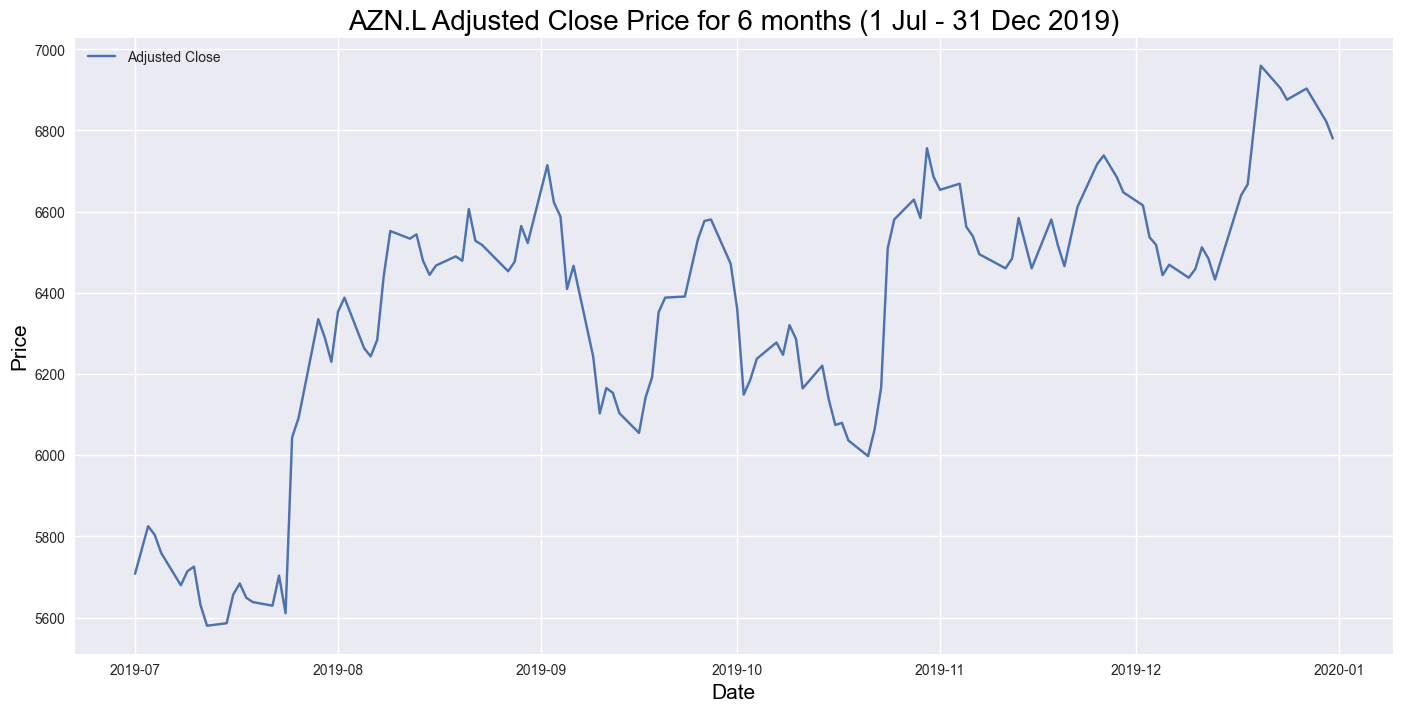

In [85]:
# Plot AZN.L Adjusted Close price for the time period

def obv_adj():
  plt.figure(figsize=(17, 8))
  plt.style.use('seaborn')
  plt.plot(azn_obv_6mo['Adj Close'], label = 'Adjusted Close')
  plt.title('AZN.L Adjusted Close Price for 6 months (1 Jul - 31 Dec 2019)', color = 'black', fontsize = 20)
  plt.xlabel('Date', color = 'black', fontsize = 15)
  plt.ylabel('Price', color = 'black', fontsize = 15)
  plt.legend()
  plt.show()

obv_adj()

In [86]:
# Calculate the OBV

OBV = []
OBV.append(0)

for i in range(1, len(azn_obv_6mo['Adj Close'])):
  if azn_obv_6mo['Adj Close'][i] > azn_obv_6mo['Adj Close'][i-1]:
    OBV.append(OBV[-1] + azn_obv_6mo.Volume[i])
  elif azn_obv_6mo['Adj Close'][i] < azn_obv_6mo['Adj Close'][i-1]:
    OBV.append(OBV[-1] - azn_obv_6mo.Volume[i])
  else:
    OBV.append(OBV[-1])

     

# Store OBV and OBV EMA in new columns

azn_obv_6mo['OBV'] = OBV
azn_obv_6mo['OBV_EMA'] = azn_obv_6mo['OBV'].ewm(span=20).mean()
azn_obv_6mo

Price,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA
Date,,,,,,,,
2019-07-01,6465.0,6516.0,6436.000000,6469.0,5707.812500,2419796.0,0.0,0.000000e+00
2019-07-02,6493.0,6548.0,6457.000000,6532.0,5763.398438,1755274.0,1755274.0,9.215189e+05
2019-07-03,6559.0,6634.0,6519.000000,6602.0,5825.162598,1362292.0,3117566.0,1.727894e+06
2019-07-04,6606.0,6611.0,6548.000000,6578.0,5803.986816,925371.0,2192195.0,1.861931e+06
2019-07-05,6577.0,6609.0,6509.000000,6527.0,5758.987305,1156314.0,1035881.0,1.662116e+06
...,...,...,...,...,...,...,...,...
2019-12-23,7771.0,7824.0,7723.870117,7746.0,6904.253906,2183949.0,18673937.0,1.071200e+07
2019-12-24,7715.0,7794.0,7631.290039,7714.0,6875.729980,378885.0,18295052.0,1.143420e+07
2019-12-27,7706.0,7781.0,7641.000000,7745.0,6903.361328,862283.0,19157335.0,1.216974e+07


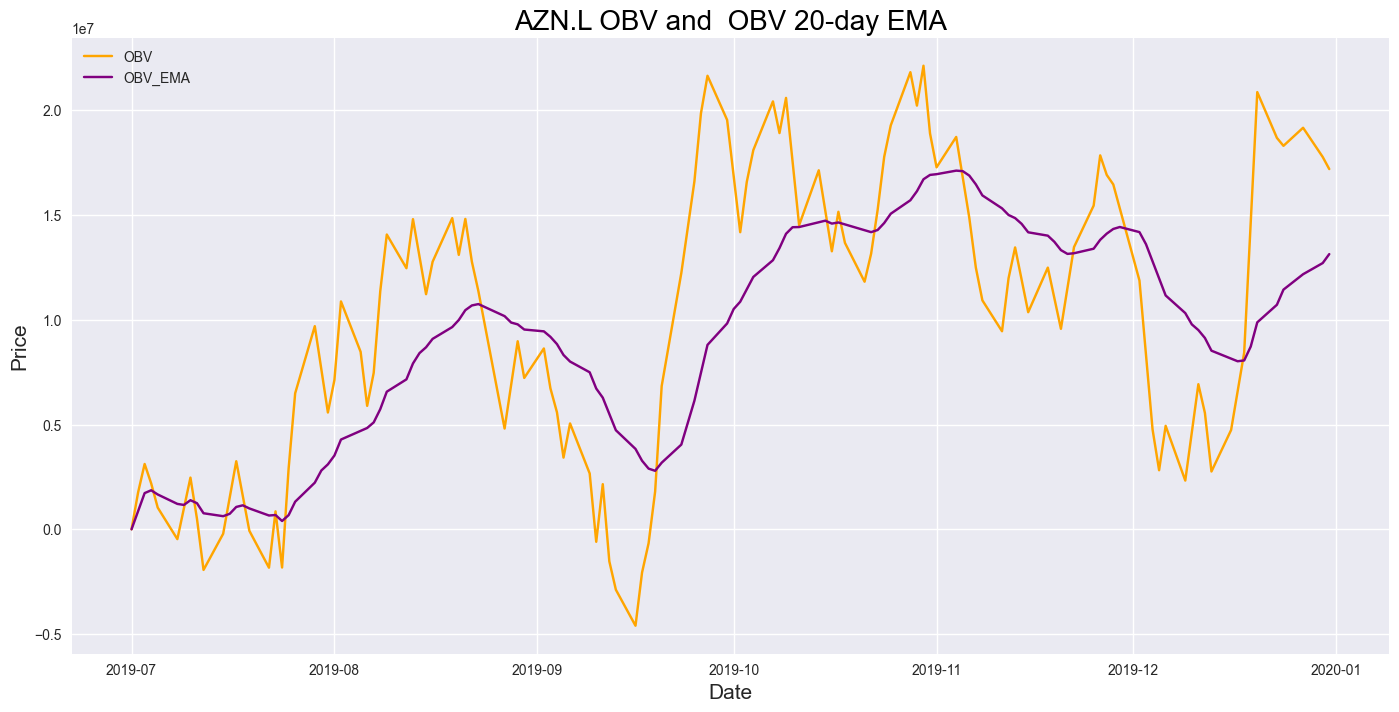

In [87]:
# Plot OBV and OBV with EMA of 20 days

def obv_ema():
  plt.figure(figsize=(17, 8))
  plt.style.use('seaborn')
  plt.plot(azn_obv_6mo['OBV'], label = 'OBV', color = 'orange')
  plt.plot(azn_obv_6mo['OBV_EMA'], label = 'OBV_EMA', color = 'purple')
  plt.title('AZN.L OBV and  OBV 20-day EMA', color = 'black', fontsize = 20)
  plt.xlabel('Date', fontsize = 15)
  plt.ylabel('Price', fontsize = 15)
  plt.legend(loc = 'upper left')
  plt.show()

obv_ema()

In [88]:
# Create function to signal when to buy and sell the stock
# If OBV > OBV_EMA then buy
# If OBV < OBV_EMA then sell
# Else do nothing

def buy_sell_obv(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(0, len(signal)):
    # If OBV > OBV_EMA then buy --> col1 => If OBV < OBV_EMA then sell => 'OBV_EMA'
    if signal[col1][i] > signal[col2][i] and flag != 1:
      sigPriceBuy.append(signal['Adj Close'][i])
      sigPriceSell.append(np.nan)
      flag = 1
     # If OBV < OBV_EMA then sell
    elif signal[col1][i] < signal[col2][i] and flag != 0:
      sigPriceSell.append(signal['Adj Close'][i])
      sigPriceBuy.append(np.nan)
      flag = 0
    else:
      sigPriceSell.append(np.nan)
      sigPriceBuy.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [89]:
# Create buy and sell columns

x = buy_sell_obv(azn_obv_6mo, 'OBV', 'OBV_EMA')
azn_obv_6mo['Buy_Signal_Price'] = x[0]
azn_obv_6mo['Sell_Signal_Price'] = x[1]

azn_obv_6mo

Price,Open,High,Low,Close,Adj Close,Volume,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2019-07-01,6465.0,6516.0,6436.000000,6469.0,5707.812500,2419796.0,0.0,0.000000e+00,NaN,NaN
2019-07-02,6493.0,6548.0,6457.000000,6532.0,5763.398438,1755274.0,1755274.0,9.215189e+05,5763.398438,NaN
2019-07-03,6559.0,6634.0,6519.000000,6602.0,5825.162598,1362292.0,3117566.0,1.727894e+06,NaN,NaN
2019-07-04,6606.0,6611.0,6548.000000,6578.0,5803.986816,925371.0,2192195.0,1.861931e+06,NaN,NaN
2019-07-05,6577.0,6609.0,6509.000000,6527.0,5758.987305,1156314.0,1035881.0,1.662116e+06,NaN,5758.987305
...,...,...,...,...,...,...,...,...,...,...
2019-12-23,7771.0,7824.0,7723.870117,7746.0,6904.253906,2183949.0,18673937.0,1.071200e+07,NaN,NaN
2019-12-24,7715.0,7794.0,7631.290039,7714.0,6875.729980,378885.0,18295052.0,1.143420e+07,NaN,NaN
2019-12-27,7706.0,7781.0,7641.000000,7745.0,6903.361328,862283.0,19157335.0,1.216974e+07,NaN,NaN


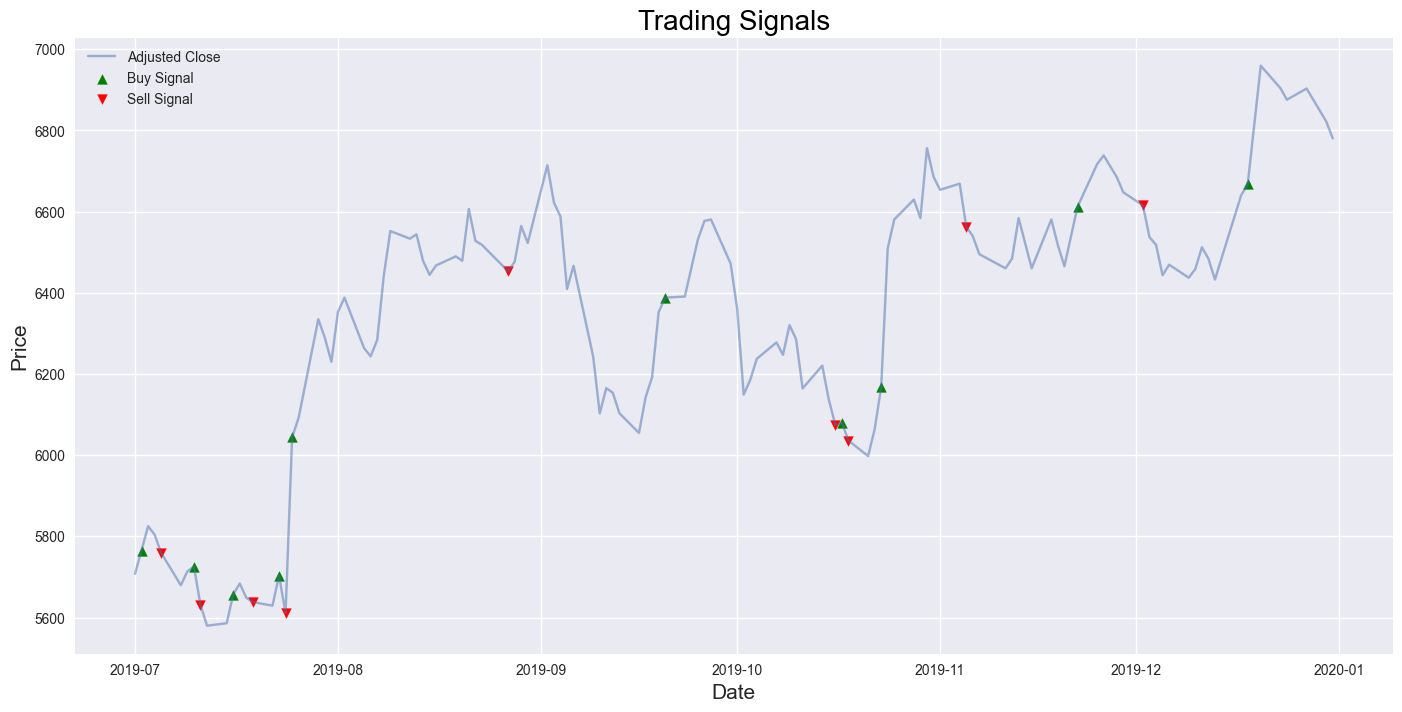

In [90]:
# Plot buy and sell trading signals

def obv_sig():
  plt.figure(figsize=(17, 8))
  plt.style.use('seaborn')
  plt.plot(azn_obv_6mo['Adj Close'], label = 'Adjusted Close', alpha = 0.5)
  plt.scatter(azn_obv_6mo.index, azn_obv_6mo['Buy_Signal_Price'], label = 'Buy Signal', marker = '^', alpha = 1, color = 'green')
  plt.scatter(azn_obv_6mo.index, azn_obv_6mo['Sell_Signal_Price'], label = 'Sell Signal', marker = 'v', alpha = 1, color = 'red')
  plt.title('Trading Signals', color = 'black', fontsize = 20)
  plt.xlabel('Date', fontsize = 15)
  plt.ylabel('Price', fontsize = 15)
  plt.legend(loc = 'upper left')
  plt.show()

obv_sig()
     

In [1]:
!git init

Initialized empty Git repository in C:/Users/sachi/Stock_price_prediction/Technical_Analysis/.git/


In [2]:
git add.

SyntaxError: invalid syntax (3081662196.py, line 1)